#### **Showcase 3: Cell conductances to global cerebral dynamics; a model summarizing scales of spontaneous and evoked activity in asynchronous and synchronous brain states.**

#### **Part 2:** Evoked activity

###### *This code has been prepared for EBRAINS by Lionel Kusch, Bahar Hazal Yalçınkaya, Thierry Nieus, Trang-Anh Nghiem, and Jennifer Goldman*
###### *Supervised by Viktor Jirsa, Marcello Massimini, and Alain Destexhe*

##### To generate and analyze simulated brain activity using the TVB-AdEX, first Import TVB from EBRAINS:

In [1]:
%%capture --no-display
!pip install --upgrade tvb-library
!pip install --upgrade tvb-data

In [2]:
!pip install bitarray

In [3]:
import pandas as pd
file_path = 'tvb_model_reference/data/QL_20120814/RegionMapping.txt'
data = pd.read_csv(file_path, header = None)
len(data[0].unique())

68

In [8]:
#Search code lines in notebooks
import nbformat
import os

def search_notebooks(directory, search_string):
    # List all files in the directory
    files = os.listdir(directory)
    
    # Filter out files that are Jupyter notebooks
    notebooks = [file for file in files if file.endswith('.ipynb')]
    
    # Iterate through each notebook
    for notebook_file in notebooks:
        with open(os.path.join(directory, notebook_file), 'r', encoding='utf-8') as f:
            notebook = nbformat.read(f, as_version=4)
            # Iterate through each cell in the notebook
            for cell in notebook.cells:
                if cell.cell_type == 'code':
                    # Check if the search string is present in the cell's source code
                    if search_string in cell.source:
                        print(f"Found in notebook: {notebook_file}")
                        break

# Provide the directory containing your Jupyter notebooks
directory = r'C:\Users\maria\Documents\tvb\pci_new'
# Provide the search string you want to look for
search_string = ', orient='

# Call the function to search for the string in the notebooks
search_notebooks(directory, search_string)

In [7]:
## Define location to save files
folder_root = './result_tau_e/'
%precision 2
%load_ext autoreload
%autoreload 2

import sys 
import os

from tvb_model_reference.view.plot import multiview,multiview_one,multiview_only_middle
from tvb.simulator.lab import cortex as ct
from tvb.simulator.lab import region_mapping as rm
from tvb.simulator.lab import surfaces as surf

## Import parameters files and tools
from tvb_model_reference_new.simulation_file.parameter.parameter_M_Berlin_new import Parameter
import tvb_model_reference_new.src.nuu_tools_simulation_human as tools
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from IPython.display import clear_output
import numpy as np
import copy
from scipy import signal
import analysis_vestigial.Lempel_Ziv as lz
import seaborn as sns
import pickle
import time
import pci_v2
import pandas

c:\Users\maria\anaconda3\Lib\site-packages\tvb\datatypes\surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


##### Next, chose the length of your simulation (in milliseconds).
##### Keep in mind that we will discard 2000 ms for the transient of the model and will analyze 300 ms before and after the stimulus to calculate the perturbational complexity index (PCI).

In [1]:
conda list --explicit > spec-file-evoked.txt


Note: you may need to restart the kernel to use updated packages.


In [8]:
run_sim = 4000.0 # Length of simulation in milliseconds

##### Set up the parameters of the model

In [9]:

parameters = Parameter()
nregions = 68 #Number of regions in the parcellation. Here, 68 from the Berlin connectomes determined from HCP data

run_sim = 4000.0 # Length of simulation in milliseconds

# Loop over values of b_e
bvals = [5] #Values of spike-frequency adaptation giving synchronous and asynchronous states
tau_es = [5.0]
Iexts = [0.000315]

# Loop over values of stimulus strength
stimvals = [1e-5, 1e-4, 1e-3]
# stimvals = [1e-2, 5e-3]

# The model takes time to stabilize. This is the time to discard after initialization

cut_transient = 2000.0 # In ms 
t_analysis  = 300. # ms, for PCI

# Loop over seeds to obtain multi5ple realizations of the model
Nseeds = 80 #Number of seeds has been reduced from 50 in the manuscript to 5 in the demonstrator for the reviewers' convenience 


# Onset time of the stimulus

stimtime_allseeds = np.random.rand(Nseeds)*(run_sim - cut_transient - 2*t_analysis) + t_analysis + cut_transient # shuffle in ms the start time of stimulus 
stimdur = 50 # ms, duration of the stimulus
stimtime_mean = 2500. # ms, time after simulation start (it will be shufled)
stim_region = 5

#There must be 300ms available before and after the stimulus for the PCI analysis.

In [4]:
run_sim = 4000

In [54]:
(run_sim - cut_transient - 2*t_analysis)+ t_analysis + cut_transient

3700.0

In [63]:
(np.where(stimtime_allseeds[:40] > 3700))

(array([ 1,  2,  4,  6,  7, 11, 13, 14, 16, 21, 22, 23, 26, 27, 29, 31, 32,
        35, 37, 38, 39]),)

In [ ]:
SEEDS = [ 1,  2,  4,  6,  7, 11, 13, 14, 16, 21, 22, 23, 26, 27, 29, 31, 32,
        35, 37, 38, 39]

In [47]:
stimtime_allseeds

array([2680.17617049, 3776.69701741, 4636.96500383, 2920.4846795 ,
       3883.87977729, 3554.74764249, 4121.37716319, 4425.99083283,
       3325.88805658, 3638.27976451, 3634.97008685, 4087.68209742,
       3588.04695721, 4513.01253881, 4025.59920625, 3234.77757144,
       4358.28483297, 2667.23674935, 2935.08288455, 3692.85807424,
       2416.33335915, 3799.01385338, 4656.7716362 , 4550.11665493,
       2321.30419834, 3005.34891268, 4481.45842172, 4581.75457644,
       2684.90614884, 3728.65655115, 3282.39731695, 4069.68099089,
       3827.6627082 , 3598.17973218, 3426.09469254, 4001.71782056,
       2949.44333345, 4132.99705882, 4650.35830148, 4234.05139501,
       2692.67225603, 4165.42733197, 2991.98677094, 4279.85672747,
       3179.2117712 , 3872.99111668, 3120.73435173, 2611.1715568 ,
       4239.77520334, 2380.48229575, 3831.95601184, 3284.98837017,
       4103.7573887 , 2971.00656281, 3534.99257781, 3377.08733334,
       4148.70262443, 3539.18973592, 3547.88438046, 3584.44197

In [5]:
folder_root

'./result_tau_e/'

##### These are the regions in the Berlin parcellation used here.

In [5]:
parameters.parameter_simulation['path_result'] = folder_root + 'synch/'

In [6]:
try:
    os.makedirs(parameters.parameter_simulation['path_result'])
except:
    print("path already existent")

In [13]:
simulator.connectivity.region_labels[5]

'caudalmiddlefrontal_R'

In [11]:
simulator = tools.init(parameters.parameter_simulation,
                              parameters.parameter_model,
                              parameters.parameter_connection_between_region,
                              parameters.parameter_coupling,
                              parameters.parameter_integrator,
                              parameters.parameter_monitor)
                       
simulator.connectivity.region_labels

array(['bankssts_L', 'bankssts_R', 'caudalanteriorcingulate_L',
       'caudalanteriorcingulate_R', 'caudalmiddlefrontal_L',
       'caudalmiddlefrontal_R', 'cuneus_L', 'cuneus_R', 'entorhinal_L',
       'entorhinal_R', 'frontalpole_L', 'frontalpole_R', 'fusiform_L',
       'fusiform_R', 'inferiorparietal_L', 'inferiorparietal_R',
       'inferiortemporal_L', 'inferiortemporal_R', 'insula_L', 'insula_R',
       'isthmuscingulate_L', 'isthmuscingulate_R', 'lateraloccipital_L',
       'lateraloccipital_R', 'lateralorbitofrontal_L',
       'lateralorbitofrontal_R', 'lingual_L', 'lingual_R',
       'medialorbitofrontal_L', 'medialorbitofrontal_R',
       'middletemporal_L', 'middletemporal_R', 'paracentral_L',
       'paracentral_R', 'parahippocampal_L', 'parahippocampal_R',
       'parsopercularis_L', 'parsopercularis_R', 'parsorbitalis_L',
       'parsorbitalis_R', 'parstriangularis_L', 'parstriangularis_R',
       'pericalcarine_L', 'pericalcarine_R', 'postcentral_L',
       'postcentra

In [1]:
dir(simulator.connectivity)

NameError: name 'simulator' is not defined

In [8]:
len(simulator.connectivity.region_labels)

68

##### To find the index of a particular region, you can use this tool.

In [15]:
# # Import library for ploting surface
# from tvb_model_reference.view.plot import multiview,multiview_one
# from tvb.simulator.lab import cortex as ct
# from tvb.simulator.lab import region_mapping as rm
# from tvb.simulator.lab import surfaces as surf

# # Import data of surface
# region_mapping_data = np.loadtxt(parameters.parameter_connection_between_region['path']+'/RegionMapping.txt',dtype=np.int)
# surface_cortex = surf.Surface().from_file(parameters.parameter_connection_between_region['path']+'/Surface_Cortex.zip')
# hemispheres_right = np.where([False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True])[0]
# hemispheres_left = np.where(np.logical_not([False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True]))[0]

# # Configure surface data for ploting
# tmp = np.copy(surface_cortex.vertices[:,0])
# surface_cortex.vertices[:,0] = surface_cortex.vertices[:,1]
# surface_cortex.vertices[:,1] = tmp
# region_mapping=rm.RegionMapping(array_data=region_mapping_data,connectivity=simulator.connectivity,surface=surface_cortex)
# cortex = ct.Cortex().from_file()
# cortex.region_mapping_data = region_mapping
# the_data = np.zeros((region_mapping.array_data.shape[0],))

# #%% And plot
# id_region = np.where(simulator.connectivity.region_labels=='caudalmiddlefrontal_R')[0][0]
# print(id_region)
# multiview_one(cortex,hemispheres_left,hemispheres_right,id_region,the_data[region_mapping.array_data],plt.figure(figsize=(8, 8)), shaded=False)

##### Next, define the strength of the stimulus and the brain region to be perturbed.
##### To simualate results from Casali et al, Sci Transl Med (2013), the right premotor area is stimulated. 

##### Run realizations of the model below. This requires roughly 1 min to simulate each second of time, so best run overnight. Do not uncomment unless you want to re-run the model with different parameters.
##### If you do re-run with different parameters, change the location of folder_root to not overwrite the previous results.

In [11]:
stimtime_allseeds

array([2680.17617049, 3776.69701741, 4636.96500383, 2920.4846795 ,
       3883.87977729, 3554.74764249, 4121.37716319, 4425.99083283,
       3325.88805658, 3638.27976451, 3634.97008685, 4087.68209742,
       3588.04695721, 4513.01253881, 4025.59920625, 3234.77757144,
       4358.28483297, 2667.23674935, 2935.08288455, 3692.85807424,
       2416.33335915, 3799.01385338, 4656.7716362 , 4550.11665493,
       2321.30419834, 3005.34891268, 4481.45842172, 4581.75457644,
       2684.90614884, 3728.65655115, 3282.39731695, 4069.68099089,
       3827.6627082 , 3598.17973218, 3426.09469254, 4001.71782056,
       2949.44333345, 4132.99705882, 4650.35830148, 4234.05139501,
       2692.67225603, 4165.42733197, 2991.98677094, 4279.85672747,
       3179.2117712 , 3872.99111668, 3120.73435173, 2611.1715568 ,
       4239.77520334, 2380.48229575, 3831.95601184, 3284.98837017,
       4103.7573887 , 2971.00656281, 3534.99257781, 3377.08733334,
       4148.70262443, 3539.18973592, 3547.88438046, 3584.44197

In [9]:
np.save("stimtime_tau_e_extra.npy", stimtime_allseeds)

In [22]:
tau_es = [3.75]

In [33]:
stimvals

[0.01, 0.005]

In [8]:
print(bvals, tau_es)

[5] [5.0]


In [12]:
bvals

[30]

In [9]:
stimvals

[1e-05, 0.0001, 0.001]

In [14]:
tau_es = [4.5]

In [65]:
SEEDS = [ 1,  2,  4,  6,  7, 11, 13, 14, 16, 21, 22, 23, 26, 27, 29, 31, 32,
        35, 37, 38, 39]

In [66]:
## Simulations with ranging tau_es, and b
## Don't run this cell if you already have the simulation files stored
 ## Uncomment this cell to run a new simulation (i.e., if you change the parameters)

T_val = 20.0
print(f"P_e = {parameters.parameter_model['P_e']}, and P_i = {parameters.parameter_model['P_i']}")


for simbe in range(len(bvals)):

    for stim_idx in range(len(stimvals)):

        for tau_val in range(len(tau_es)):

            print(f"b_e = {bvals[simbe]}, stim = {stimvals[stim_idx]}, tau_e= {tau_es[tau_val]}, Iext = {Iexts[0]}")

            parameters.parameter_model['T'] = T_val

            parameters.parameter_model['E_L_e'] = -64.0
            parameters.parameter_model['E_L_i'] = -65.0
            parameters.parameter_model['b_e'] = bvals[simbe]

            parameters.parameter_model['tau_e'] = tau_es[tau_val]

            parameters.parameter_model['external_input_ex_ex']=Iexts[0]
            parameters.parameter_model['external_input_in_ex']=Iexts[0]

            weight = list(np.zeros(simulator.number_of_nodes))
            weight[stim_region] = stimvals[stim_idx] # region and stimulation strength of the region 0 

            parameters.parameter_stimulus["tau"]= stimdur # stimulus duration [ms]
            parameters.parameter_stimulus["T"]= 1e9 # interstimulus interval [ms]
            parameters.parameter_stimulus["weights"]= weight
            parameters.parameter_stimulus["variables"]=[0] #variable to kick

            
            # what is the purpose of these lines
            parameters.parameter_stimulus['onset'] = cut_transient + 0.5*(run_sim-cut_transient)
            stim_time = parameters.parameter_stimulus['onset']
            stim_steps = stim_time*10 #number of steps until stimulus
            
            eli = int(parameters.parameter_model['E_L_i'])
            ele = int(parameters.parameter_model['E_L_e'])
            fel = f"/eli_{eli}_ele_{ele}"
            fiext = Iexts[0]*1000

            ffolder_root = folder_root + "/evoked" + fel + f'/Iext_{fiext}' 
            try:
                os.listdir(ffolder_root)
            except:
                os.makedirs(ffolder_root)
            
            for seedy in SEEDS:
                parameters.parameter_stimulus['onset'] = stimtime_allseeds[seedy]

                print('seed =', seedy)
                print('stim_time = ', stimtime_allseeds[seedy])
                
                parameters.parameter_simulation['path_result'] = ffolder_root + '/' + \
                'stim_'+str(stimvals[stim_idx])+'_b_e_'+str(bvals[simbe])\
                + '_Iext_'+str(Iexts[0])+ "_tau_e_" + str(tau_es[tau_val])\
                +"_El_e_" + str(parameters.parameter_model['E_L_e'])+ "_El_i_" + str(parameters.parameter_model['E_L_i'])\
                +'_seed_'+str(seedy)+'/'
                simulator = tools.init(parameters.parameter_simulation,
                                          parameters.parameter_model,
                                          parameters.parameter_connection_between_region,
                                          parameters.parameter_coupling,
                                          parameters.parameter_integrator,
                                          parameters.parameter_monitor,
                                          parameter_stimulation=parameters.parameter_stimulus,
                                          my_seed=seedy)
                tools.run_simulation(simulator,
                                 run_sim,                            
                                 parameters.parameter_simulation,
                                 parameters.parameter_monitor)
                np.save(ffolder_root + '/' +  'stimtime_' + 'stim_'+str(stimvals[stim_idx])+'_b_e_'+str(bvals[simbe])\
                + '_Iext_'+str(Iexts[0])+ "_tau_e_" + str(tau_es[tau_val])\
                +"_El_e_" + str(parameters.parameter_model['E_L_e'])+ "_El_i_" + str(parameters.parameter_model['E_L_i'])\
                +'_seed_'+str(seedy)+ '.npy', [stimtime_allseeds[seedy]])


P_e = [-0.05017034, 0.00451531, -0.00794377, -0.00208418, -0.00054697, 0.00341614, -0.01156433, 0.00194753, 0.00274079, -0.01066769], and P_i = [-0.05184978, 0.0061593, -0.01403522, 0.00166511, -0.0020559, 0.00318432, -0.03112775, 0.00656668, 0.00171829, -0.04516385]
b_e = 5, stim = 1e-05, tau_e= 5.0, Iext = 0.000315
seed = 1
stim_time =  3417.0586297956474
simulation time :1000.0
simulation time :2000.0
simulation time :3000.0
simulation time :4000.0
seed = 2
stim_time =  3448.562631857734
simulation time :1000.0
simulation time :2000.0
simulation time :3000.0
simulation time :4000.0
seed = 4
stim_time =  3142.802809508013
simulation time :1000.0
simulation time :2000.0
simulation time :3000.0
simulation time :4000.0
seed = 6
stim_time =  2949.471768134096
simulation time :1000.0
simulation time :2000.0
simulation time :3000.0
simulation time :4000.0
seed = 7
stim_time =  2960.024042194322
simulation time :1000.0
simulation time :2000.0
simulation time :3000.0
simulation time :4000.0


simulation time :3000.0
simulation time :4000.0
seed = 31
stim_time =  3068.248842135965
simulation time :1000.0
simulation time :2000.0
simulation time :3000.0
simulation time :4000.0
seed = 32
stim_time =  2518.99626566943
simulation time :1000.0
simulation time :2000.0
simulation time :3000.0
simulation time :4000.0
seed = 35
stim_time =  3213.580121423543
simulation time :1000.0
simulation time :2000.0
simulation time :3000.0
simulation time :4000.0
seed = 37
stim_time =  3446.523313802066
simulation time :1000.0
simulation time :2000.0
simulation time :3000.0
simulation time :4000.0
seed = 38
stim_time =  2318.982225634896
simulation time :1000.0
simulation time :2000.0
simulation time :3000.0
simulation time :4000.0
seed = 39
stim_time =  3486.9826935577103
simulation time :1000.0
simulation time :2000.0
simulation time :3000.0
simulation time :4000.0


In [38]:
folder_root

'./result_tau_e/'

In [39]:
#load all stimtimes into one variable
eli = -65
ele = -64
fel = f"/eli_{eli}_ele_{ele}"
fiext = Iexts[0]*1000

ffolder_root = folder_root + "evoked" + fel + f'/Iext_{fiext}' 

stimtime_allseeds = []
stim_time = []
for seedy in range(Nseeds):
    stimtime = np.load(ffolder_root + '/' +  'stimtime_' + 'stim_'+str(stimvals[0])+'_b_e_'+str(bvals[0])\
                + '_Iext_'+str(Iexts[0])+ "_tau_e_" + str(tau_es[0])\
                +"_El_e_" + str(-64.0)+ "_El_i_" + str(-65.0)\
                +'_seed_'+str(seedy)+ '.npy')
    stimtime_allseeds.append(stimtime[0])
print(stimtime_allseeds)

NameError: name 'Iexts' is not defined

In [7]:
eli = -65
ele = -64
fel = f"/eli_{eli}_ele_{ele}"
fiext = Iexts[0]*1000

ffolder_root = folder_root + "evoked" + fel + f'/Iext_{fiext}' 

In [ ]:
# ONE VALUE B_e

# plot signals and means

# plotting mean over seeds, now aligned to stim onset

#plt.figure()

# # Loop over values of b_e
# bvals = [60] #Values of spike-frequency adaptation giving synchronous and asynchronous states

# # Loop over values of stimulus strength
# stimvals = [1e-5]#[1e-7,1e-6,1e-5] 

#PaintMe = ['DarkSlateGray', 'LightCoral', 'PeachPuff']


id_region_stim = 5

nseeds = Nseeds

timestep_ms = 0.1 # Model dT [ms]

t_plot = 2000 #ms, size of plotting window

means = np.ones((len(tau_es), len(stimvals), nseeds, int(t_plot/timestep_ms), nregions))*np.NAN
i=0

for tau_val in range(len(tau_es)):
    for stim_idx in range(len(stimvals)):
        for seedy in range(nseeds):

    
            times_l = [] #times_l takes all the time points from the raw monitor
            rateE_m = [] #takes all the outputs of all the regions for that timepoint
            bE = bvals[0]
            ampstim = stimvals[stim_idx]

            file_name = 'stim_'+str(stimvals[stim_idx])+'_b_e_'+str(bvals[0])\
                + '_Iext_'+str(Iexts[0])+ "_tau_e_" + str(tau_es[tau_val])\
                +"_El_e_" + str(parameters.parameter_model['E_L_e'])+ "_El_i_" + str(parameters.parameter_model['E_L_i'])\
                +'_seed_'+str(seedy)

            folder_path =  ffolder_root + '/' + file_name +'/'

            nstep = int(run_sim/1000) # number of saved files

            for i_step in range(nstep):
                raw_curr = np.load(folder_path + 'step_'+str(i_step)+'.npy',
                   encoding = 'latin1', allow_pickle=True)
                for i_time in range(len(raw_curr[0])): 
                    times_l.append(raw_curr[0][i_time][0])
                    rateE_m.append(np.concatenate(raw_curr[0][i_time][1][0]))

            times_l = np.array(times_l) # in ms
            rateE_m = np.array(rateE_m) # matrix of size nbins*nregions

            trial_whole = rateE_m#[:,id_region_stim]
            trial_aligned = trial_whole[np.logical_and(times_l > stimtime_allseeds[seedy] - t_plot/2,
                                                       times_l < stimtime_allseeds[seedy] + t_plot/2), :]
            idx_start = int(np.max([0,t_plot/2 - stimtime_allseeds[seedy]])/timestep_ms)
            idx_stop = int((t_plot - np.max([0, stimtime_allseeds[seedy] + t_plot/2 - times_l[-1]]))/timestep_ms)+1
            print(times_l, len(trial_aligned), idx_start, idx_stop, idx_stop - idx_start)
            means[tau_val, stim_idx, seedy, idx_start:idx_stop, :] = trial_aligned

        #plt.plot(np.arange(len(trial_aligned))*timestep_ms, trial_aligned*1e3, color = 'grey', alpha = 0.3)
        #plt.ylim(0,25)
#plt.axvline(t_plot/2, color='gold', linestyle=':')

#mean = np.nanmean(means[simnum, stim_idx,:,:,id_region_stim], axis = 0)*1e3
#plt.plot(np.arange(len(np.nanmean(means[simnum, stim_idx, :, :, id_region_stim], axis = 0)))*timestep_ms, np.nanmean(means[simnum, stim_idx, :, :, id_region_stim], axis = 0)*1e3,label="stim : "+str(stimvals[stim_idx]), color= 'k', linewidth=1.5)
        #axes.axvline((parameters.parameter_stimulus['onset'] - cut_transient)/0.1, color='k', linestyle=':')
        #h_std = mean+np.std(means[simnum, stim_idx])
        #l_std = mean-np.std(means[simnum, stim_idx])
        #axes.fill_between(l_std, h_std, color='grey')
#             axes.set_ylim(ymax=25,ymin=0.)
#             axes.set_xlabel('time [ms/0.1]')
#             axes.set_ylabel('firing rate [Hz]')
#             axes.legend()
        plt.figure()
        ax1=plt.axes()
        ax1.set_ylim(bottom=0, top = 15)
        ax1.axvline(t_plot/2, color='k', linestyle=':')

        mean_stimreg = np.nanmean(means[tau_val, stim_idx,:,:,id_region_stim], 
                                  axis = 0)*1e3
        std_stimreg = np.nanstd(means[tau_val, stim_idx,:,:,id_region_stim], 
                                  axis = 0)*1e3
        ax1.plot(np.arange(len(mean_stimreg))*timestep_ms, 
                 mean_stimreg,
                 label="stim : "+str(stimvals[stim_idx]), 
                 color='black', linewidth=2)
        ax1.fill_between(np.arange(len(mean_stimreg))*timestep_ms, 
                 mean_stimreg - std_stimreg, mean_stimreg + std_stimreg, 
                 label="stim : "+str(stimvals[stim_idx]), 
                 color='black', alpha = 0.5)
        plt.savefig('sig_alignedtostim_mean'+str(nseeds)+'seeds_' + file_name +'.pdf')            
#plt.savefig('Plot_ColorStim_SigNAL_and_Mean' + str(nseeds)+ 'Seeds_b' + str(bvals)+ '_stim' +str(stimvals)+ '.pdf')
# result [0][1][:,0,5]

[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 20000 0 20001 20001
[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 20000 0 20001 20001
[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 16480 0 16480 16480
[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 20000 0 20001 20001
[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 16440 0 16440 16440
[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 13741 0 13741 13741
[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 20000 0 20001 20001
[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 20000 0 20001 20001
[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 15632 0 15632 15632
[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 18004 0 18004 18004
[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 20000 0 

[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 20000 0 20001 20001
[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 20000 0 20001 20001
[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 18086 0 18086 18086
[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 20000 0 20001 20001
[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 20000 0 20001 20001
[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 16433 0 16433 16433
[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 20000 0 20001 20001
[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 20000 0 20001 20001
[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 20000 0 20001 20001
[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 20000 0 20001 20001
[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 19321 0 

[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 19321 0 19321 19321
[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 19289 0 19289 19289
[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 17907 0 17907 17907
[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 15055 0 15055 15055
[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 14380 0 14380 14380
[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 13357 0 13357 13357
[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 20000 0 20001 20001
[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 20000 0 20001 20001
[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 20000 0 20001 20001
[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 20000 0 20001 20001
[1.0000e-01 2.0000e-01 3.0000e-01 ... 3.9998e+03 3.9999e+03 4.0000e+03] 20000 0 

##### Now calculate the perturbational complexity.
##### First, re-load the data and concatenate the data from the time steps.
##### Select the model state variable for the calculation (here, excitatory firing rate). 
##### Discard the model transient.
##### Define the time for analysis and plot the region of data used. 
##### Now binarise brain regions based on significance of changes in activity induced by the stimulus.
##### Calculate the Lempel-Ziv complexity of the binarized matrix.
##### Normalize the Lempel-Ziv by the entropy of the binarized matrix.

##### This part is a little computationally expensive. If it crashes, try closing your other kernals and try again. 

In [22]:
# delete the means variable because it takes up a lot of memory

variable_size = sys.getsizeof(means)
print(variable_size*1e-9, "GB")

%reset_selective means

5.222400168 GB
Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [12]:
tau_es

[3.75]

In [13]:
Nseeds

40

In [59]:
ffolder_root

'./result_tau_e/evoked/eli_-65_ele_-64/Iext_0.315'

In [51]:
times_l

NameError: name 'times_l' is not defined

In [53]:
ampstim_all=[1e-5,1e-4]

In [62]:
tau_es = [5.0,4.0]

In [74]:
np.arange(0,10,5) 

array([0, 5])

In [76]:
bE=30
for ampstim in ampstim_all[:1]:
    for tau_e in tau_es[:1]:
        print('\n','bE=', bE, 'amptstim=', ampstim, 'tau_e=', tau_e) #100.0# adaptation strength in nS

#%% file reading        
        n_seeds = Nseeds # number of independent random seeds and simulations
        n_trials = 5 # number of simulations/realisations to analyse for one PCI value
       
        sim_names = np.arange(0,6,n_trials) 
        for sim_curr in sim_names:   #0,  5, 10, 15, 20, 25, 30, 35
            print(sim_curr)
            entropy_trials = []
            LZ_trials = []
            PCI_trials = []

            sig_all_trials = []
            for i_trials in range(sim_curr, sim_curr + n_trials): 
                print(i_trials)
                # if we had 40 seeds and n_trials=5 then 
                #for i_trials in range(0, 5)
                # for i_trials in range (5,10)
                times_l = []
                rateE_m = []

                folder_path =  ffolder_root + '/' + \
                    'stim_'+str(ampstim)+'_b_e_'+str(bvals[0])\
                    + '_Iext_'+str(Iexts[0])+ "_tau_e_" + str(tau_e)\
                    +"_El_e_" + str(-64.0)+ "_El_i_" + str(parameters.parameter_model['E_L_i'])\
                    +'_seed_'+str(i_trials)+'/'
                nstep = int(run_sim/1000) # number of saved files

                for i_step in range(nstep):
                    raw_curr = np.load(folder_path + 'step_'+str(i_step)+'.npy',
                       encoding = 'latin1', allow_pickle=True)
                    for i_time in range(len(raw_curr[0])): 
                        times_l.append(raw_curr[0][i_time][0])
                        rateE_m.append(np.concatenate(raw_curr[0][i_time][1][0]))

                times_l = np.array(times_l) # in ms
                rateE_m = np.array(rateE_m) # matrix of size nbins*nregions

                t_total = times_l[-1] # last recorded time
                nbins, nregions = rateE_m.shape

                #%% choosing variable of interest
                var_of_interest = rateE_m
                varname = 'rateE'              

                #%% discard transient
                nbins_transient = int(cut_transient/times_l[0]) # to discard in analysis   
                sig_region_all = var_of_interest[nbins_transient:,:] 
                sig_region_all = np.transpose(sig_region_all) # now formatted as regions*times
                times = times_l[nbins_transient:]
                sig_all_trials.append(sig_region_all)   

            #%% Calculate signal analysis time in bins; model dT * time (bin length = 0.1ms)
            sig_all_trials = np.array(sig_all_trials)
            
#             t_stim_bins = int((stimtime_allseeds[i_trials] - cut_transient)/times_l[0]) #stimulus bin - transient duration in bins
    #Take directly the stim onset from the parameter json file
            with open(folder_path+"parameter.json", 'r') as json_file:
                data = json.load(json_file)
            onset_value = data['parameter_stimulation']['onset']
            t_stim_bins = int((onset_value - cut_transient)/times_l[0])
            
            #%% Plot example signals from the stimulated region before and after stimulus 
            #(demonstrating what will be used in the analysis)
            #plt.plot(sig_all_trials[0,5,:], '0.5')
            #plt.axvline(t_stim_bins, color = 'r')

            #%% analyse only 300 ms before and after stimulus
            t_analysis = 300 #ms
            nbins_analysis =  int(t_analysis/times_l[0])

            sig_cut_analysis = sig_all_trials[:,:,
                            t_stim_bins - nbins_analysis:t_stim_bins + nbins_analysis]
                        #%% binarisation


 bE= 30 amptstim= 1e-05 tau_e= 5.0
0
0
1
2
3
4


NameError: name 'json' is not defined

In [77]:
import json

with open(folder_path+"parameter.json", 'r') as json_file:
    data = json.load(json_file)
onset_value = data['parameter_stimulation']['onset']
t_stim_bins = int((onset_value - cut_transient)/times_l[0])

#%% Plot example signals from the stimulated region before and after stimulus 
#(demonstrating what will be used in the analysis)
#plt.plot(sig_all_trials[0,5,:], '0.5')
#plt.axvline(t_stim_bins, color = 'r')

#%% analyse only 300 ms before and after stimulus
t_analysis = 300 #ms
nbins_analysis =  int(t_analysis/times_l[0])

sig_cut_analysis = sig_all_trials[:,:,
                t_stim_bins - nbins_analysis:t_stim_bins + nbins_analysis]

In [81]:
np.shape(sig_cut_analysis)

(5, 68, 6000)

In [82]:
# sig_all_binary = tools.binarise_signals(sig_cut_analysis, int(t_analysis/times_l[0]), 
#                                   nshuffles = 10, 
#                      percentile = 100)

signal_m = sig_cut_analysis
t_stim = int(t_analysis/times_l[0])
nshuffles = 10
percentile = 100

In [83]:
ntrials, nsources, nbins = signal_m.shape
print(ntrials, nsources, nbins)

5 68 6000


In [84]:
means_prestim = np.mean(signal_m[:,:,:t_stim], axis = 2)
print(means_prestim.shape)

(5, 68)


In [108]:
 signal_centre =\
        signal_m / means_prestim[:,:, np.newaxis] - 1

In [110]:
std_prestim = np.std(signal_centre[:,:,:t_stim], axis = 2)

In [111]:
signal_centre_norm = signal_centre / std_prestim[:,:, np.newaxis] 

In [119]:
signal_centre_norm[:,:,:t_stim].mean()

-1.1703056824284004e-18

In [121]:
signalcn_tuple = tuple(signal_centre_norm)# not affected by shuffling    
signal_prestim_shuffle = signal_centre_norm[:,:,:t_stim]


max_absval_surrogates = np.zeros(nshuffles)


for i_shuffle in range(nshuffles):
    for i_source in range(nsources):
        for i_trial in range(ntrials):
            signal_curr = signal_prestim_shuffle[i_trial, i_source]
            np.random.shuffle(signal_curr)
            signal_prestim_shuffle[i_trial, i_source] = signal_curr

            #average over trials
            shuffle_avg = np.mean(signal_prestim_shuffle, axis = 0)

            max_absval_surrogates[i_shuffle] = np.max(np.abs(shuffle_avg))

In [14]:
# ONE VALUE B_e

# Perturbational Complexity Index (PCI) computation and saving
# # # Loop over values of b_e
bE_all = bvals 
bE = 30
ampstim_all = stimvals
timestep_ms = 0.1 # Model dT [ms]

# stimtime_allseeds = np.load(folder_root + 'stimtime_allseeds.npy', encoding = 'latin1')

for ampstim in ampstim_all:
    for tau_e in tau_es:
        print('\n','bE=', bE, 'amptstim=', ampstim, 'tau_e=', tau_e) #100.0# adaptation strength in nS

#%% file reading        
        n_seeds = Nseeds # number of independent random seeds and simulations
        n_trials = 5 # number of simulations/realisations to analyse for one PCI value
       
        sim_names = np.arange(0,n_seeds,n_trials) 
        for sim_curr in sim_names:   #0,  5, 10, 15, 20, 25, 30, 35
            entropy_trials = []
            LZ_trials = []
            PCI_trials = []

            sig_all_trials = []
            for i_trials in range(sim_curr, sim_curr + n_trials): 
                # if we had 40 seeds and n_trials=5 then 
                #for i_trials in range(0, 5)
                # for i_trials in range (5,10)
                times_l = []
                rateE_m = []

                folder_path =  ffolder_root + '/' + \
                    'stim_'+str(ampstim)+'_b_e_'+str(bvals[0])\
                    + '_Iext_'+str(Iexts[0])+ "_tau_e_" + str(tau_e)\
                    +"_El_e_" + str(parameters.parameter_model['E_L_e'])+ "_El_i_" + str(parameters.parameter_model['E_L_i'])\
                    +'_seed_'+str(i_trials)+'/'
                nstep = int(run_sim/1000) # number of saved files

                for i_step in range(nstep):
                    raw_curr = np.load(folder_path + 'step_'+str(i_step)+'.npy',
                       encoding = 'latin1', allow_pickle=True)
                    for i_time in range(len(raw_curr[0])): 
                        times_l.append(raw_curr[0][i_time][0])
                        rateE_m.append(np.concatenate(raw_curr[0][i_time][1][0]))

                times_l = np.array(times_l) # in ms
                rateE_m = np.array(rateE_m) # matrix of size nbins*nregions

                t_total = times_l[-1] # last recorded time
                nbins, nregions = rateE_m.shape

                #%% choosing variable of interest
                var_of_interest = rateE_m
                varname = 'rateE'              

                #%% discard transient
                nbins_transient = int(cut_transient/times_l[0]) # to discard in analysis   
                sig_region_all = var_of_interest[nbins_transient:,:] 
                sig_region_all = np.transpose(sig_region_all) # now formatted as regions*times
                times = times_l[nbins_transient:]
                sig_all_trials.append(sig_region_all)   

            #%% Calculate signal analysis time in bins; model dT * time (bin length = 0.1ms)
            sig_all_trials = np.array(sig_all_trials)
            
#             t_stim_bins = int((stimtime_allseeds[i_trials] - cut_transient)/times_l[0]) #stimulus bin - transient duration in bins
    #Take directly the stim onset from the parameter json file
            with open(folder_path+"parameter.json", 'r') as json_file:
                data = json.load(json_file)
            onset_value = data['parameter_stimulation']['onset']
            t_stim_bins = int((onset_value - cut_transient)/times_l[0])
            
            #%% Plot example signals from the stimulated region before and after stimulus 
            #(demonstrating what will be used in the analysis)
            #plt.plot(sig_all_trials[0,5,:], '0.5')
            #plt.axvline(t_stim_bins, color = 'r')

            #%% analyse only 300 ms before and after stimulus
            t_analysis = 300 #ms
            nbins_analysis =  int(t_analysis/times_l[0])

            sig_cut_analysis = sig_all_trials[:,:,
                            t_stim_bins - nbins_analysis:t_stim_bins + nbins_analysis]
                        #%% binarisation
            sig_all_binary = tools.binarise_signals(sig_cut_analysis, int(t_analysis/times_l[0]), 
                                              nshuffles = 10, 
                                 percentile = 100) 
            
            # this is a boolean array with shape as the signal_m : (n_trials :5 , n_regions :68, times :2*300/dt = 6000)

            #%% return entropy
            for ijk in range(n_trials):

                binJ=sig_all_binary.astype(int)[ijk,:,t_analysis:] # CHECK each row is a time series !
                binJs=pci_v2.sort_binJ(binJ) # sort binJ as done in Casali et al. 2013
                source_entropy=pci_v2.source_entropy(binJs)
                print('Entropy', source_entropy)

                #%% return Lempel-Ziv
                Lempel_Ziv_lst=pci_v2.lz_complexity_2D(binJs)
                print('Lempel-Ziv', Lempel_Ziv_lst)

                #normalization factor 
                norm=pci_v2.pci_norm_factor(binJs)


                #%% computing perturbational complexity index
                pci_lst = Lempel_Ziv_lst/norm
                print('PCI', pci_lst)

                all_entropy_lst=[source_entropy,pci_lst]

                entropy_trials.append(all_entropy_lst) 
                LZ_trials.append(Lempel_Ziv_lst) 
                PCI_trials.append(pci_lst) 

            #%% file saving
            amp_title= np.array(ampstim)
            save_file_name = folder_path + 'LionelJune2020_Params_PCI_bE_' + str(bE) + '_stim_'+ str(ampstim) + '_tau_e_' + str(tau_e)+'_trial_'+ str(int(sim_curr/n_trials))+ '.npy'
            savefile = {}
            savefile['entropy'] = np.array(entropy_trials)
            savefile['Lempel-Ziv'] = np.array(LZ_trials)
            savefile['PCI'] = np.array(PCI_trials)

            np.save(save_file_name, savefile)
            print(save_file_name)
            print('Seed', sim_curr + ijk, ' done\n')


 bE= 30 amptstim= 1e-05 tau_e= 3.75
Entropy 0.9224012408633072
Lempel-Ziv 1383
PCI 0.07181166288021516
Entropy 0.5575726061635735
Lempel-Ziv 1525
PCI 0.13099692373427388
Entropy 0.14117971807062274
Lempel-Ziv 1450
PCI 0.4919130835642496
Entropy 0.18559492896903512
Lempel-Ziv 1769
PCI 0.45651432408810405
Entropy 0.4611362616038909
Lempel-Ziv 1588
PCI 0.1649354104150854
./result_tau_e//evoked/eli_-65_ele_-64/Iext_0.315/stim_1e-05_b_e_30_Iext_0.000315_tau_e_3.75_El_e_-64.0_El_i_-65.0_seed_4/LionelJune2020_Params_PCI_bE_30_stim_1e-05_tau_e_3.75_trial_0.npy
Seed 4  done

Entropy 0.34782423866582035
Lempel-Ziv 1263
PCI 0.1739146588526312
Entropy 0.8024178411170595
Lempel-Ziv 683
PCI 0.040767380722196
Entropy 0.8961350544731572
Lempel-Ziv 1007
PCI 0.05382061874139716
Entropy 0.7618176083184831
Lempel-Ziv 1078
PCI 0.06777358143498992
Entropy 0.2864955850171077
Lempel-Ziv 804
PCI 0.13440975728091
./result_tau_e//evoked/eli_-65_ele_-64/Iext_0.315/stim_1e-05_b_e_30_Iext_0.000315_tau_e_3.75_El_e_

Lempel-Ziv 1458
PCI 0.23963559679844273
Entropy 0.6432451893482608
Lempel-Ziv 1316
PCI 0.0979878038564843
Entropy 0.04696523317508278
Lempel-Ziv 243
PCI 0.24781207977796652
Entropy 0.690501841640223
Lempel-Ziv 1535
PCI 0.1064721981813048
./result_tau_e//evoked/eli_-65_ele_-64/Iext_0.315/stim_0.0001_b_e_30_Iext_0.000315_tau_e_3.75_El_e_-64.0_El_i_-65.0_seed_39/LionelJune2020_Params_PCI_bE_30_stim_0.0001_tau_e_3.75_trial_7.npy
Seed 39  done


 bE= 30 amptstim= 0.001 tau_e= 3.75
Entropy 0.9238849010899042
Lempel-Ziv 1344
PCI 0.06967453532623875
Entropy 0.6360288012547213
Lempel-Ziv 1492
PCI 0.11235301280571523
Entropy 0.10750049295884276
Lempel-Ziv 1057
PCI 0.4709309280628341
Entropy 0.18406515124204492
Lempel-Ziv 1726
PCI 0.4491194890458831
Entropy 0.9108045853715608
Lempel-Ziv 1506
PCI 0.0791940302860809
./result_tau_e//evoked/eli_-65_ele_-64/Iext_0.315/stim_0.001_b_e_30_Iext_0.000315_tau_e_3.75_El_e_-64.0_El_i_-65.0_seed_4/LionelJune2020_Params_PCI_bE_30_stim_0.001_tau_e_3.75_trial_0.n

0 5
1 5
2 5
3 5
4 5
5 5
6 5
7 5
0 5
1 5
2 5
3 5
4 5
5 5
6 5
7 5
0 5
1 5
2 5
3 5
4 5
5 5
6 5
7 5
0 5
1 5
2 5
3 5
4 5
5 5
6 5
7 5
0 5
1 5
2 5
3 5
4 5
5 5
6 5
7 5
0 5
1 5
2 5
3 5
4 5
5 5
6 5
7 5
0 5
1 5
2 5
3 5
4 5
5 5
6 5
7 5
0 5
1 5
2 5
3 5
4 5
5 5
6 5
7 5
0 5
1 5
2 5
3 5
4 5
5 5
6 5
7 5


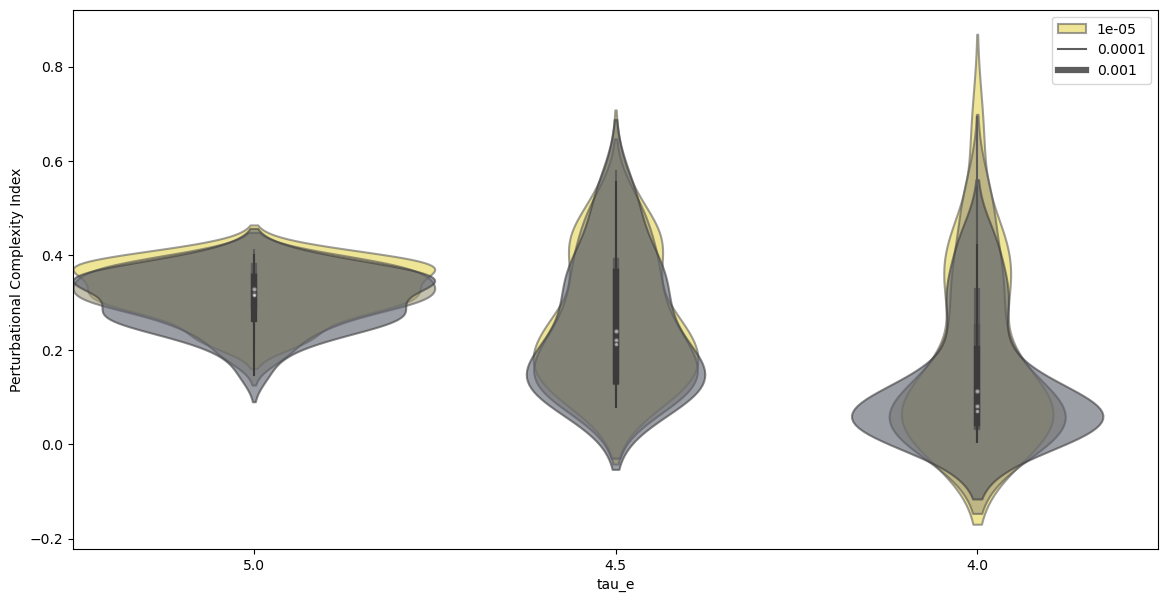

In [9]:
# ONE VALUE OF B_e

# # # Loop over values of b_e
# bvals = [0] #Values of spike-frequency adaptation giving synchronous and asynchronous states

# # # Loop over values of stimulus strength
# stimvals = [1e-4] #[1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2] 

parameters.parameter_model['E_L_e'] = -64.0
parameters.parameter_model['E_L_i'] = -65.0

n_trials = 5

cmap = plt.get_cmap('cividis_r')

bE_all = bvals #np.linspace(0,20,11)
ampstim_all = stimvals
PCI_all=[]

ctr = 0
plt.figure(figsize=[14,7])
for ampstim in ampstim_all:
    PCI_states = []

    for tau_e in tau_es:
        PCI_curr = []
        for i_trials in range(int(Nseeds/n_trials)):
            folder_path =  ffolder_root + '/' + \
                        'stim_'+str(ampstim)+'_b_e_'+str(bvals[0])\
                        + '_Iext_'+str(Iexts[0])+ "_tau_e_" + str(tau_e)\
                        +"_El_e_" + str(parameters.parameter_model['E_L_e'])+ "_El_i_" + str(parameters.parameter_model['E_L_i'])\
                        +'_seed_'+str(i_trials*n_trials+(n_trials-1))+'/'
            
            
            file_name = folder_path + 'LionelJune2020_Params_PCI_bE_' + str(bvals[0]) + '_stim_'+ str(ampstim) + '_tau_e_' + str(tau_e)+'_trial_'+ str(i_trials)+ '.npy'
#save_file_name = folder_path + 'LionelJune2020_Params_PCI_bE_' + str(bE) + '_stim_'+ str(ampstim) + '_tau_i_' + str(tau_i)+'_trial_'+ str(int(sim_curr/n_trials))+ '.npy'

                
            data_curr = np.load(file_name, encoding = 'latin1', allow_pickle = True).item()
            PCI_curr.append(data_curr['PCI'][-n_trials:])
            print(i_trials, len(data_curr['PCI']))
        PCI_states.append(np.concatenate(PCI_curr))
    
    ax = seaborn.violinplot(data = PCI_states, width = 1., saturation = 0.75, 
                       color = cmap(int(ctr/len(ampstim_all)*255)), 
                       label = 'amp = '+ str(ampstim), alpha = 0.1)
    ctr += 1
    PCI_all.append(PCI_states)

plt.setp(ax.collections, alpha=.6)


plt.xticks(np.arange(len(tau_es)), 
           tau_es)
plt.xlabel('Adaptation')
plt.xlabel('tau_e')
plt.ylabel('Perturbational Complexity Index')
plt.legend(ampstim_all)
plt.savefig('Plot_violins_PCI_tau_e.png')
plt.show()

In [15]:
tau_es = [5.,4.,3.75]

In [16]:
# ONE VALUE OF B_e

# # # Loop over values of b_e
# bvals = [0] #Values of spike-frequency adaptation giving synchronous and asynchronous states

# # # Loop over values of stimulus strength
# stimvals = [1e-4] #[1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2] 

parameters.parameter_model['E_L_e'] = -64.0
parameters.parameter_model['E_L_i'] = -65.0

n_trials = 5

cmap = plt.get_cmap('cividis_r')

bE_all = bvals #np.linspace(0,20,11)
ampstim_all = stimvals
PCI_all=[]

ctr = 0
plt.figure(figsize=[14,7])
for ampstim in ampstim_all:
    PCI_states = []

    for tau_e in tau_es:
        PCI_curr = []
        for i_trials in range(int(Nseeds/n_trials)):
            folder_path =  ffolder_root + '/' + \
                        'stim_'+str(ampstim)+'_b_e_'+str(bvals[0])\
                        + '_Iext_'+str(Iexts[0])+ "_tau_e_" + str(tau_e)\
                        +"_El_e_" + str(parameters.parameter_model['E_L_e'])+ "_El_i_" + str(parameters.parameter_model['E_L_i'])\
                        +'_seed_'+str(i_trials*n_trials+(n_trials-1))+'/'
            
            
            file_name = folder_path + 'LionelJune2020_Params_PCI_bE_' + str(bvals[0]) + '_stim_'+ str(ampstim) + '_tau_e_' + str(tau_e)+'_trial_'+ str(i_trials)+ '.npy'
#save_file_name = folder_path + 'LionelJune2020_Params_PCI_bE_' + str(bE) + '_stim_'+ str(ampstim) + '_tau_i_' + str(tau_i)+'_trial_'+ str(int(sim_curr/n_trials))+ '.npy'

                
            data_curr = np.load(file_name, encoding = 'latin1', allow_pickle = True).item()
            PCI_curr.append(data_curr['PCI'][-n_trials:])
            print(i_trials, len(data_curr['PCI']))
        PCI_states.append(np.concatenate(PCI_curr))
    
    ctr += 1
    PCI_all.append(PCI_states)

0 5
1 5
2 5
3 5
4 5
5 5
6 5
7 5
0 5
1 5
2 5
3 5
4 5
5 5
6 5
7 5
0 5
1 5
2 5
3 5
4 5
5 5
6 5
7 5
0 5
1 5
2 5
3 5
4 5
5 5
6 5
7 5
0 5
1 5
2 5
3 5
4 5
5 5
6 5
7 5
0 5
1 5
2 5
3 5
4 5
5 5
6 5
7 5
0 5
1 5
2 5
3 5
4 5
5 5
6 5
7 5
0 5
1 5
2 5
3 5
4 5
5 5
6 5
7 5
0 5
1 5
2 5
3 5
4 5
5 5
6 5
7 5


<Figure size 1400x700 with 0 Axes>

In [2]:
tau_es = [5.0, 4.0, 3.75]

NameError: name 'tau_es' is not defined

In [12]:
eli = -65
ele = -64
fel = f"/eli_{eli}_ele_{ele}"
fiext = Iexts[0]*1000

ffolder_root = folder_root + "evoked" + fel + f'/Iext_{fiext}' 

In [13]:
ffolder_root

'./result_tau_e/evoked/eli_-65_ele_-64/Iext_0.315'

In [16]:
stimvals = [1e-5,1e-4,1e-3]

In [19]:
tau_es = [5.0, 4.0, 3.75]

In [23]:
Nseeds = 40

In [59]:
Nregions

68

In [60]:
run_sim

4000.0

In [79]:
import json

In [161]:
stimvals = [1e-5,1e-4,1e-3]
tau_es = [5.0,4.0,3.75]

In [49]:
Nseeds = 60

In [7]:
ffolder_root = './result_tau_e/evoked/eli_-65_ele_-64/Iext_0.315'

In [200]:
ffolder_root

'./result_tau_e/evoked/eli_-65_ele_-64/Iext_0.315'

In [48]:
tau_es = [5.0]

In [7]:
stimvals = [1e-5, 1e-4,1e-3]

In [16]:
ffolder_root = './result_tau_i/evoked/eli_-65_ele_-64/Iext_0.315'

In [15]:
ffolder_root

'./result_tau_e/evoked/eli_-65_ele_-64/Iext_0.315'

In [18]:
import json

In [22]:
bvals = [30]
tau_es = [8.0]

In [69]:
Nseeds = 40

In [72]:
bvals

[5]

In [19]:
tau_es

[5.0]

In [3]:
stim = 1e-5

if stim:
    print("ok")

ok


In [75]:
# Try so that all the trials have the right t_stims
# ONE VALUE B_e

# CHECK THE T_STIMS!!!!

# Perturbational Complexity Index (PCI) computation and saving
# # # Loop over values of b_e
bE_all = bvals 
bE = bvals[0]
ampstim_all = stimvals
timestep_ms = 0.1 # Model dT [ms]

parameters.parameter_model['E_L_e'] = -64.0
parameters.parameter_model['E_L_i'] = -65.0

# stimtime_allseeds = np.load(folder_root + 'stimtime_allseeds.npy', encoding = 'latin1')
# sig_all_taus = np.empty(shape = (int(len(stimvals)*len(tau_es)),5,Nregions,6000))
count = 0

for ampstim in ampstim_all:
    for tau_e in tau_es:
        print('\n','bE=', bvals[0], 'amptstim=', ampstim, 'tau_e=', tau_e) #100.0# adaptation strength in nS

#%% file reading        
        n_seeds = Nseeds # number of independent random seeds and simulations
        n_trials = 5 # number of simulations/realisations to analyse for one PCI value
       
        sim_names = np.arange(0,n_seeds,n_trials) 
        for sim_curr in sim_names:   #0,  5, 10, 15, 20, 25, 30, 35
            print(sim_curr)
            entropy_trials = []
            LZ_trials = []
            PCI_trials = []

            sig_cut_analysis = []
            t_stim_onsets = []
            for i_trials in range(sim_curr, sim_curr + n_trials): 
                print(i_trials)
                # if we had 40 seeds and n_trials=5 then 
                #for i_trials in range(0, 5)
                # for i_trials in range (5,10)
                times_l = []
                rateE_m = []
                nstep = int(run_sim/1000) # number of saved files

                try:
                    folder_path =  ffolder_root + '/' + \
                        'stim_'+str(ampstim)+'_b_e_'+str(bvals[0])\
                        + '_Iext_'+str(Iexts[0])+ "_tau_e_" + str(tau_e)\
                        +"_El_e_" + str(parameters.parameter_model['E_L_e'])+ "_El_i_" + str(parameters.parameter_model['E_L_i'])\
                        +'_seed_'+str(i_trials)+'/'

                    for i_step in range(nstep):
                        raw_curr = np.load(folder_path + 'step_'+str(i_step)+'.npy',
                           encoding = 'latin1', allow_pickle=True)
                        for i_time in range(len(raw_curr[0])): 
                            times_l.append(raw_curr[0][i_time][0])
                            rateE_m.append(np.concatenate(raw_curr[0][i_time][1][0]))
                            
                    str_save = '_tau_e_'
                            
                except FileNotFoundError:
                    folder_path =  ffolder_root + '/' + \
                        'stim_'+str(ampstim)+'_b_e_'+str(bvals[0])\
                        + '_Iext_'+str(Iexts[0])+ "_tau_i_" + str(tau_e)\
                        +"_El_e_" + str(parameters.parameter_model['E_L_e'])+ "_El_i_" + str(parameters.parameter_model['E_L_i'])\
                        +'_seed_'+str(i_trials)+'/'         


                    for i_step in range(nstep):
                        raw_curr = np.load(folder_path + 'step_'+str(i_step)+'.npy',
                           encoding = 'latin1', allow_pickle=True)
                        for i_time in range(len(raw_curr[0])): 
                            times_l.append(raw_curr[0][i_time][0])
                            rateE_m.append(np.concatenate(raw_curr[0][i_time][1][0]))
                            
                    str_save = '_tau_i_'
#                 nstep = int(run_sim/1000) # number of saved files

#                 for i_step in range(nstep):
#                     raw_curr = np.load(folder_path + 'step_'+str(i_step)+'.npy',
#                        encoding = 'latin1', allow_pickle=True)
#                     for i_time in range(len(raw_curr[0])): 
#                         times_l.append(raw_curr[0][i_time][0])
#                         rateE_m.append(np.concatenate(raw_curr[0][i_time][1][0]))

                times_l = np.array(times_l) # in ms
                rateE_m = np.array(rateE_m) # matrix of size nbins*nregions

                t_total = times_l[-1] # last recorded time
                nbins, nregions = rateE_m.shape

                #%% choosing variable of interest
                var_of_interest = rateE_m
                varname = 'rateE'              

                #%% discard transient
                nbins_transient = int(cut_transient/times_l[0]) # to discard in analysis   
                sig_region_all = var_of_interest[nbins_transient:,:] 
                sig_region_all = np.transpose(sig_region_all) # now formatted as regions*times
                times = times_l[nbins_transient:]
                
                # load t_onset
                with open(folder_path+"parameter.json", 'r') as json_file:
                    data = json.load(json_file)
                onset_value = data['parameter_stimulation']['onset']
                t_stim_bins = int((onset_value - cut_transient)/times_l[0])
                
                #save all the onsets:
                t_stim_onsets.append(t_stim_bins)

                t_analysis = 300 #ms
                nbins_analysis =  int(t_analysis/times_l[0])
                
                sig_cut_region =  sig_region_all[:,t_stim_bins - nbins_analysis:t_stim_bins + nbins_analysis]
                
                # append directly the sig_cut_analysis
                sig_cut_analysis.append(sig_cut_region)

            sig_all_binary = tools.binarise_signals(np.array(sig_cut_analysis), int(t_analysis/times_l[0]), 
                                              nshuffles = 10, 
                                 percentile = 100)
            
                        #%% return entropy
            for ijk in range(n_trials):

                binJ=sig_all_binary.astype(int)[ijk,:,t_analysis:] # CHECK each row is a time series !
                binJs=pci_v2.sort_binJ(binJ) # sort binJ as done in Casali et al. 2013
                source_entropy=pci_v2.source_entropy(binJs)
                print('Entropy', source_entropy)

                #%% return Lempel-Ziv
                Lempel_Ziv_lst=pci_v2.lz_complexity_2D(binJs)
                print('Lempel-Ziv', Lempel_Ziv_lst)

                #normalization factor 
                norm=pci_v2.pci_norm_factor(binJs)


                #%% computing perturbational complexity index
                pci_lst = Lempel_Ziv_lst/norm
                print('PCI', pci_lst)

                all_entropy_lst=[source_entropy,pci_lst]

                entropy_trials.append(all_entropy_lst) 
                LZ_trials.append(Lempel_Ziv_lst) 
                PCI_trials.append(pci_lst) 

            #%% file saving
            amp_title= np.array(ampstim)
            save_file_name = folder_path + 'LionelJune2020_Params_PCI_bE_' + str(bvals[0]) + '_stim_'+ str(ampstim) + str_save + str(tau_e)+'_trial_'+ str(int(sim_curr/n_trials))+ '_pers_stims.npy'
            savefile = {}
            savefile['entropy'] = np.array(entropy_trials)
            savefile['Lempel-Ziv'] = np.array(LZ_trials)
            savefile['PCI'] = np.array(PCI_trials)

            np.save(save_file_name, savefile)
            print(save_file_name)
            print('Seed', sim_curr + ijk, ' done\n')



 bE= 5 amptstim= 1e-05 tau_e= 5.0
0
0
1
2
3
4
Entropy 0.24580622700945534
Lempel-Ziv 2149
PCI 0.4187320628569105
Entropy 0.23725396888762962
Lempel-Ziv 1923
PCI 0.3882026358301125
Entropy 0.23349314417688483
Lempel-Ziv 1855
PCI 0.38050683507936134
Entropy 0.22395238872720308
Lempel-Ziv 1900
PCI 0.4063409425928077
Entropy 0.22332831295587535
Lempel-Ziv 1782
PCI 0.3821700034944016
./result_tau_e//evoked/eli_-65_ele_-64/Iext_0.315/stim_1e-05_b_e_5_Iext_0.000315_tau_e_5.0_El_e_-64.0_El_i_-65.0_seed_4/LionelJune2020_Params_PCI_bE_5_stim_1e-05_tau_e_5.0_trial_0_pers_stims.npy
Seed 4  done

5
5
6
7
8
9
Entropy 0.25724529494009796
Lempel-Ziv 1757
PCI 0.3271274611960611
Entropy 0.2579821508655178
Lempel-Ziv 1887
PCI 0.35032805889027774
Entropy 0.2404437953563906
Lempel-Ziv 1992
PCI 0.3967970560352819
Entropy 0.23916054187116945
Lempel-Ziv 1901
PCI 0.3807020978257485
Entropy 0.26151509972155296
Lempel-Ziv 2282
PCI 0.41793770358311766
./result_tau_e//evoked/eli_-65_ele_-64/Iext_0.315/stim_1e-05_

Lempel-Ziv 1975
PCI 0.33165898713431213
./result_tau_e//evoked/eli_-65_ele_-64/Iext_0.315/stim_0.0001_b_e_5_Iext_0.000315_tau_e_5.0_El_e_-64.0_El_i_-65.0_seed_34/LionelJune2020_Params_PCI_bE_5_stim_0.0001_tau_e_5.0_trial_6_pers_stims.npy
Seed 34  done

35
35
36
37
38
39
Entropy 0.24345024326886663
Lempel-Ziv 1913
PCI 0.3763547823626542
Entropy 0.23321666049220283
Lempel-Ziv 1550
PCI 0.31832064619059014
Entropy 0.2463467095472286
Lempel-Ziv 1874
PCI 0.3643472556047317
Entropy 0.24709782359799864
Lempel-Ziv 1671
PCI 0.3238919927420911
Entropy 0.2365373125989792
Lempel-Ziv 1893
PCI 0.3833042525168741
./result_tau_e//evoked/eli_-65_ele_-64/Iext_0.315/stim_0.0001_b_e_5_Iext_0.000315_tau_e_5.0_El_e_-64.0_El_i_-65.0_seed_39/LionelJune2020_Params_PCI_bE_5_stim_0.0001_tau_e_5.0_trial_7_pers_stims.npy
Seed 39  done


 bE= 5 amptstim= 0.001 tau_e= 5.0
0
0
1
2
3
4
Entropy 0.26577619330303437
Lempel-Ziv 2236
PCI 0.40294744309098984
Entropy 0.2561844003283293
Lempel-Ziv 2017
PCI 0.37709076711897804


In [33]:
i_trials = 2

In [27]:
sig_cut_analysis[0].shape

(5, 68, 6000)

In [25]:
len(sig_cut_analysis)

5

In [ ]:
signal_binary

In [146]:
signal_binary[-1,0].shape

(6000,)

In [132]:
signal_binary.shape

(5, 68, 6000)

In [131]:
len(signal_binary[-1])

68

In [158]:
sig_all_binary = signal_binary

In [79]:
# Import resources

%precision 2
%load_ext autoreload
%autoreload 2

from tvb_model_reference.view.plot import multiview,multiview_one
from tvb.simulator.lab import cortex as ct
from tvb.simulator.lab import region_mapping as rm
from tvb.simulator.lab import surfaces as surf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
i_trials  = 4
n_trials = 5
for i_trials in range(int(10/n_trials), int(30/n_trials)):
    seeds_arr = i_trials*n_trials + np.arange(0,5,1)
    print(seeds_arr)

[10 11 12 13 14]
[15 16 17 18 19]
[20 21 22 23 24]
[25 26 27 28 29]


In [15]:
seeds_arr

array([15, 16, 17, 18, 19])

In [4]:
#Load sig_all_bin with dictionary

stimvals = [1e-5, 1e-4, 1e-3]

n_trials = 5

ampstim_all = stimvals
PCI_all=[]
dict_all = []


for ampstim in ampstim_all:
    PCI_states = []
    dict_PCI = []

#  Awake b_e=5
    tau_es = [5.0, 3.75, 7.0, 5.0]
    bvals = [5, 30, 30, 120]
    
    for tau_e, b_e in zip(tau_es, bvals):
        print(f"stim  = {ampstim}, b_e = {b_e}, tau = {tau_e}")
        PCI_curr = []
        for i_trials in range(int(10/n_trials), int(30/n_trials)):
            ffolder_root = './pers_stim/sig_all_binary/' 
          
            file_name = ffolder_root + 'sig_all_binary_' + str(b_e) + '_stim_'+ str(ampstim) \
            + '_tau_e_' + str(tau_e)+'_trial_'+ str(i_trials)+ "_pers_stims" + '.npy'
   
            try:
                data_curr = np.load(file_name)
            except FileNotFoundError:
                print("trying tau_i")

                file_name = ffolder_root + 'sig_all_binary_' + str(b_e) + '_stim_'+ str(ampstim) \
                    + '_tau_i_' + str(tau_e)+'_trial_'+ str(i_trials)+ "_pers_stims" + '.npy'
                
                try:
                    data_curr = np.load(file_name)
                except FileNotFoundError:
                    print("not existing file: ", file_name)
                    pass

                pass
                
            PCI_curr.append(data_curr)
            seeds_arr = i_trials*n_trials + np.arange(0,5,1)

            if i_trials ==2: 
                result_dict = {index: item for index, item in zip(seeds_arr, data_curr)}
            else: 
                new_dict = {index: item for index, item in zip(seeds_arr, data_curr)}
                result_dict.update(new_dict)

        print("append wake")

        dict_PCI.append(result_dict)
    
    print("append PCI states, stim : ", ampstim)
    PCI_all.append(PCI_states) #should have len = 3, and PCI_all[0] length = 6
    dict_all.append(dict_PCI)


stim  = 1e-05, b_e = 5, tau = 5.0
append wake
stim  = 1e-05, b_e = 30, tau = 3.75
append wake
stim  = 1e-05, b_e = 30, tau = 7.0
trying tau_i
trying tau_i
trying tau_i
trying tau_i
append wake
stim  = 1e-05, b_e = 120, tau = 5.0
append wake
append PCI states, stim :  1e-05
stim  = 0.0001, b_e = 5, tau = 5.0
append wake
stim  = 0.0001, b_e = 30, tau = 3.75
append wake
stim  = 0.0001, b_e = 30, tau = 7.0
trying tau_i
trying tau_i
trying tau_i
trying tau_i
append wake
stim  = 0.0001, b_e = 120, tau = 5.0
append wake
append PCI states, stim :  0.0001
stim  = 0.001, b_e = 5, tau = 5.0
append wake
stim  = 0.001, b_e = 30, tau = 3.75
append wake
stim  = 0.001, b_e = 30, tau = 7.0
trying tau_i
trying tau_i
trying tau_i
trying tau_i
append wake
stim  = 0.001, b_e = 120, tau = 5.0
append wake
append PCI states, stim :  0.001


In [34]:
i_stim = 2  #0 = 1e-5, 1 = 1e-4, 2 = 1e-3 Hz
cond = 0    #0 = wake, 1= ket, 2 = gaba, 3 = sleep
seed = 15   #between 10 and 29

bin_array = dict_all[i_stim][cond][seed]

In [35]:
bin_array.shape

(68, 6000)

In [37]:
len(bin_array[34])

6000

In [56]:
plt.clf()

<Figure size 640x480 with 0 Axes>

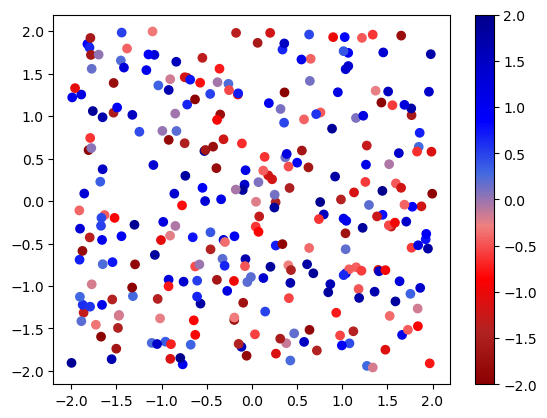

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

x,y,c = zip(*np.random.rand(300,3)*4-2)

norm=plt.Normalize(-2,2)
cmap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", ["darkred", "firebrick", "red","lightcoral","royalblue","blue", "mediumblue","darkblue"])

plt.scatter(x,y,c=c, cmap=cmap1, norm=norm)
plt.colorbar()
plt.show()

In [19]:
the_data

array([ nan,  nan,  nan,  nan,  nan,  4.5,  nan, 25.3,  nan, 19.2,  nan,
       25.2,  nan,  nan, 33.7,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, 91.9,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  0. ,
        0. ,  nan])

In [18]:
the_data[region_mapping.array_data]

array([ nan,  nan,  nan, ..., 25.2,  nan,  nan])

In [ ]:
np.full

In [27]:
the_data_2 = np.full_like(the_data, np.nan)

the_data_2[5] = 300

the_data_2

array([ nan,  nan,  nan,  nan,  nan, 300.,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan])

In [16]:
region_mapping.array_data

array([22, 22, 22, ..., 11, 57, 57], dtype=int64)

In [24]:
simulator.connectivity.region_labels

array(['bankssts_L', 'bankssts_R', 'caudalanteriorcingulate_L',
       'caudalanteriorcingulate_R', 'caudalmiddlefrontal_L',
       'caudalmiddlefrontal_R', 'cuneus_L', 'cuneus_R', 'entorhinal_L',
       'entorhinal_R', 'frontalpole_L', 'frontalpole_R', 'fusiform_L',
       'fusiform_R', 'inferiorparietal_L', 'inferiorparietal_R',
       'inferiortemporal_L', 'inferiortemporal_R', 'insula_L', 'insula_R',
       'isthmuscingulate_L', 'isthmuscingulate_R', 'lateraloccipital_L',
       'lateraloccipital_R', 'lateralorbitofrontal_L',
       'lateralorbitofrontal_R', 'lingual_L', 'lingual_R',
       'medialorbitofrontal_L', 'medialorbitofrontal_R',
       'middletemporal_L', 'middletemporal_R', 'paracentral_L',
       'paracentral_R', 'parahippocampal_L', 'parahippocampal_R',
       'parsopercularis_L', 'parsopercularis_R', 'parsorbitalis_L',
       'parsorbitalis_R', 'parstriangularis_L', 'parstriangularis_R',
       'pericalcarine_L', 'pericalcarine_R', 'postcentral_L',
       'postcentra

<Axes: ylabel='time (ms)'>

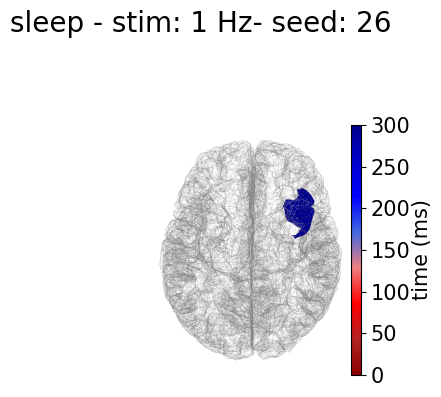

In [29]:
multiview_only_middle(cortex,hemispheres_left,hemispheres_right,the_data_2[region_mapping.array_data],plt.figure(figsize=(5, 5)), shaded=False, CB_position=[0.8, 0.25, 0.02, 0.5],
                CB_orientation='vertical',CB_fontsize=15,zmin=0,zmax=300,cmap=cmap, title=f"{cond_names[cond]} - stim: {stim_names[i_stim]} Hz- seed: {seed}")

In [12]:
# #extract and plot first time significant by region
timestep_ms = 0.1 # Model dT [ms]
cond_names = ["wake", "ketamine", "gaba", "sleep"]
stim_names = ['0.01', '0.1', '1']

i_stim = 2  #0 = 1e-5, 1 = 1e-4, 2 = 1e-3 Hz
cond = 1    #0 = wake, 1= ket, 2 = gaba, 3 = sleep
seed = 15   #between 10 and 29

bin_array = dict_all[i_stim][cond][seed]


# Import data of surface
region_mapping_data = np.loadtxt(parameters.parameter_connection_between_region['path']+'/RegionMapping.txt',dtype=int)
surface_cortex = surf.Surface().from_file(parameters.parameter_connection_between_region['path']+'/Surface_Cortex.zip')
hemispheres_right = np.where([False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True])[0]
hemispheres_left = np.where(np.logical_not([False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True]))[0]

# Configure surface data for ploting
tmp = np.copy(surface_cortex.vertices[:,0])
surface_cortex.vertices[:,0] = surface_cortex.vertices[:,1]
surface_cortex.vertices[:,1] = tmp
region_mapping=rm.RegionMapping(array_data=region_mapping_data,connectivity=simulator.connectivity,surface=surface_cortex)
cortex = ct.Cortex().from_file()
cortex.region_mapping_data = region_mapping

for seed in range(26,27):
    for cond in range(4):
        bin_array = dict_all[i_stim][cond][seed]
        ## plot
        Nregions = bin_array.shape[0]
        first_time_sig = np.ones(Nregions)*np.NAN
        # print(int(len(sig_all_binary[-1,0])/2))
        for i_reg in range(Nregions):
            times_sig_curr = np.where(bin_array[i_reg,int(len(bin_array[i_reg])/2):] == 1)[0]*timestep_ms
            if len(times_sig_curr) > 0: #significant once or more
                first_time_sig[i_reg] = times_sig_curr[0]

        # print(first_time_sig)

        #%% And plot
        the_data = first_time_sig
        # cmap = plt.cm.Blues #coolwarm #RdYlBu #YlGnBu #plt.cm.RdGy
        cmap=cmap1
        # cmap = cmap.reversed()
        cmap.set_under(color='white')
        multiview_only_middle(cortex,hemispheres_left,hemispheres_right,the_data[region_mapping.array_data],plt.figure(figsize=(5, 5)), shaded=False, CB_position=[0.8, 0.25, 0.02, 0.5],
                CB_orientation='vertical',CB_fontsize=15,zmin=0,zmax=300,cmap=cmap, title=f"{cond_names[cond]} - stim: {stim_names[i_stim]} Hz- seed: {seed}")
# zmax=np.nanmax(the_data)
        tit = f"stim_{stim_names[i_stim]}_{cond_names[cond]}_seed_{seed}"

        try:
            os.listdir(fr'./figures/stim_{stim_names[i_stim]}/seed_{seed}/')
        except:
            os.makedirs(fr'./figures/stim_{stim_names[i_stim]}/seed_{seed}/')

        plt.savefig(fr'./figures/stim_{stim_names[i_stim]}/seed_{seed}/'+ tit +'_one_view_cmap.png')

        plt.close()
    plt.close()

In [6]:
# Function to load images from a folder
def load_images(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".png") or filename.endswith(".jpg"):  # Filter only image files
            img = plt.imread(os.path.join(folder_path, filename))
            images.append(img)
    return images

# Function to create a new image with subplots
def create_subplots(images, save_folder, tit):
    fig, axes = plt.subplots(2, 2)  # Create a 2x2 grid of subplots
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])  # Display each image in its corresponding subplot
        ax.axis('off')  # Turn off axes
    plt.savefig(save_folder+tit+'.png')


# Path to the folder containing the images
for i_stim in range(3):
    for seed in range(10,30):
        folder_path = fr'./figures/stim_{stim_names[i_stim]}/seed_{seed}/'
        save_folder = fr'./figures/stim_{stim_names[i_stim]}/'
        images = load_images(folder_path)
        tit = f"stim_{stim_names[i_stim]}_{cond_names[cond]}_seed_{seed}"
        
        create_subplots(images, save_folder, tit)

NameError: name 'os' is not defined

WARNING    /tmp/ipykernel_17121/4067698018.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  region_mapping_data = np.loadtxt(parameters.parameter_connection_between_region['path']+'/RegionMapping.txt',dtype=np.int)
 [py.warnings]


2023-09-12 17:12:36,639 - WARNING - py.warnings - /tmp/ipykernel_17121/4067698018.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  region_mapping_data = np.loadtxt(parameters.parameter_connection_between_region['path']+'/RegionMapping.txt',dtype=np.int)

3000
[5.700e+00 0.000e+00 3.950e+01 5.000e-01 4.000e+01 1.000e-01 2.260e+01
 1.260e+01 2.120e+01 0.000e+00 2.700e+01 8.500e+00 3.000e+00 4.190e+01
 9.600e+00 6.140e+01 1.030e+01 2.314e+02 1.177e+02 2.040e+01 8.050e+01
 9.860e+01 2.100e+00 3.000e-01 3.380e+01 0.000e+00 0.000e+00 0.000e+00
 4.1

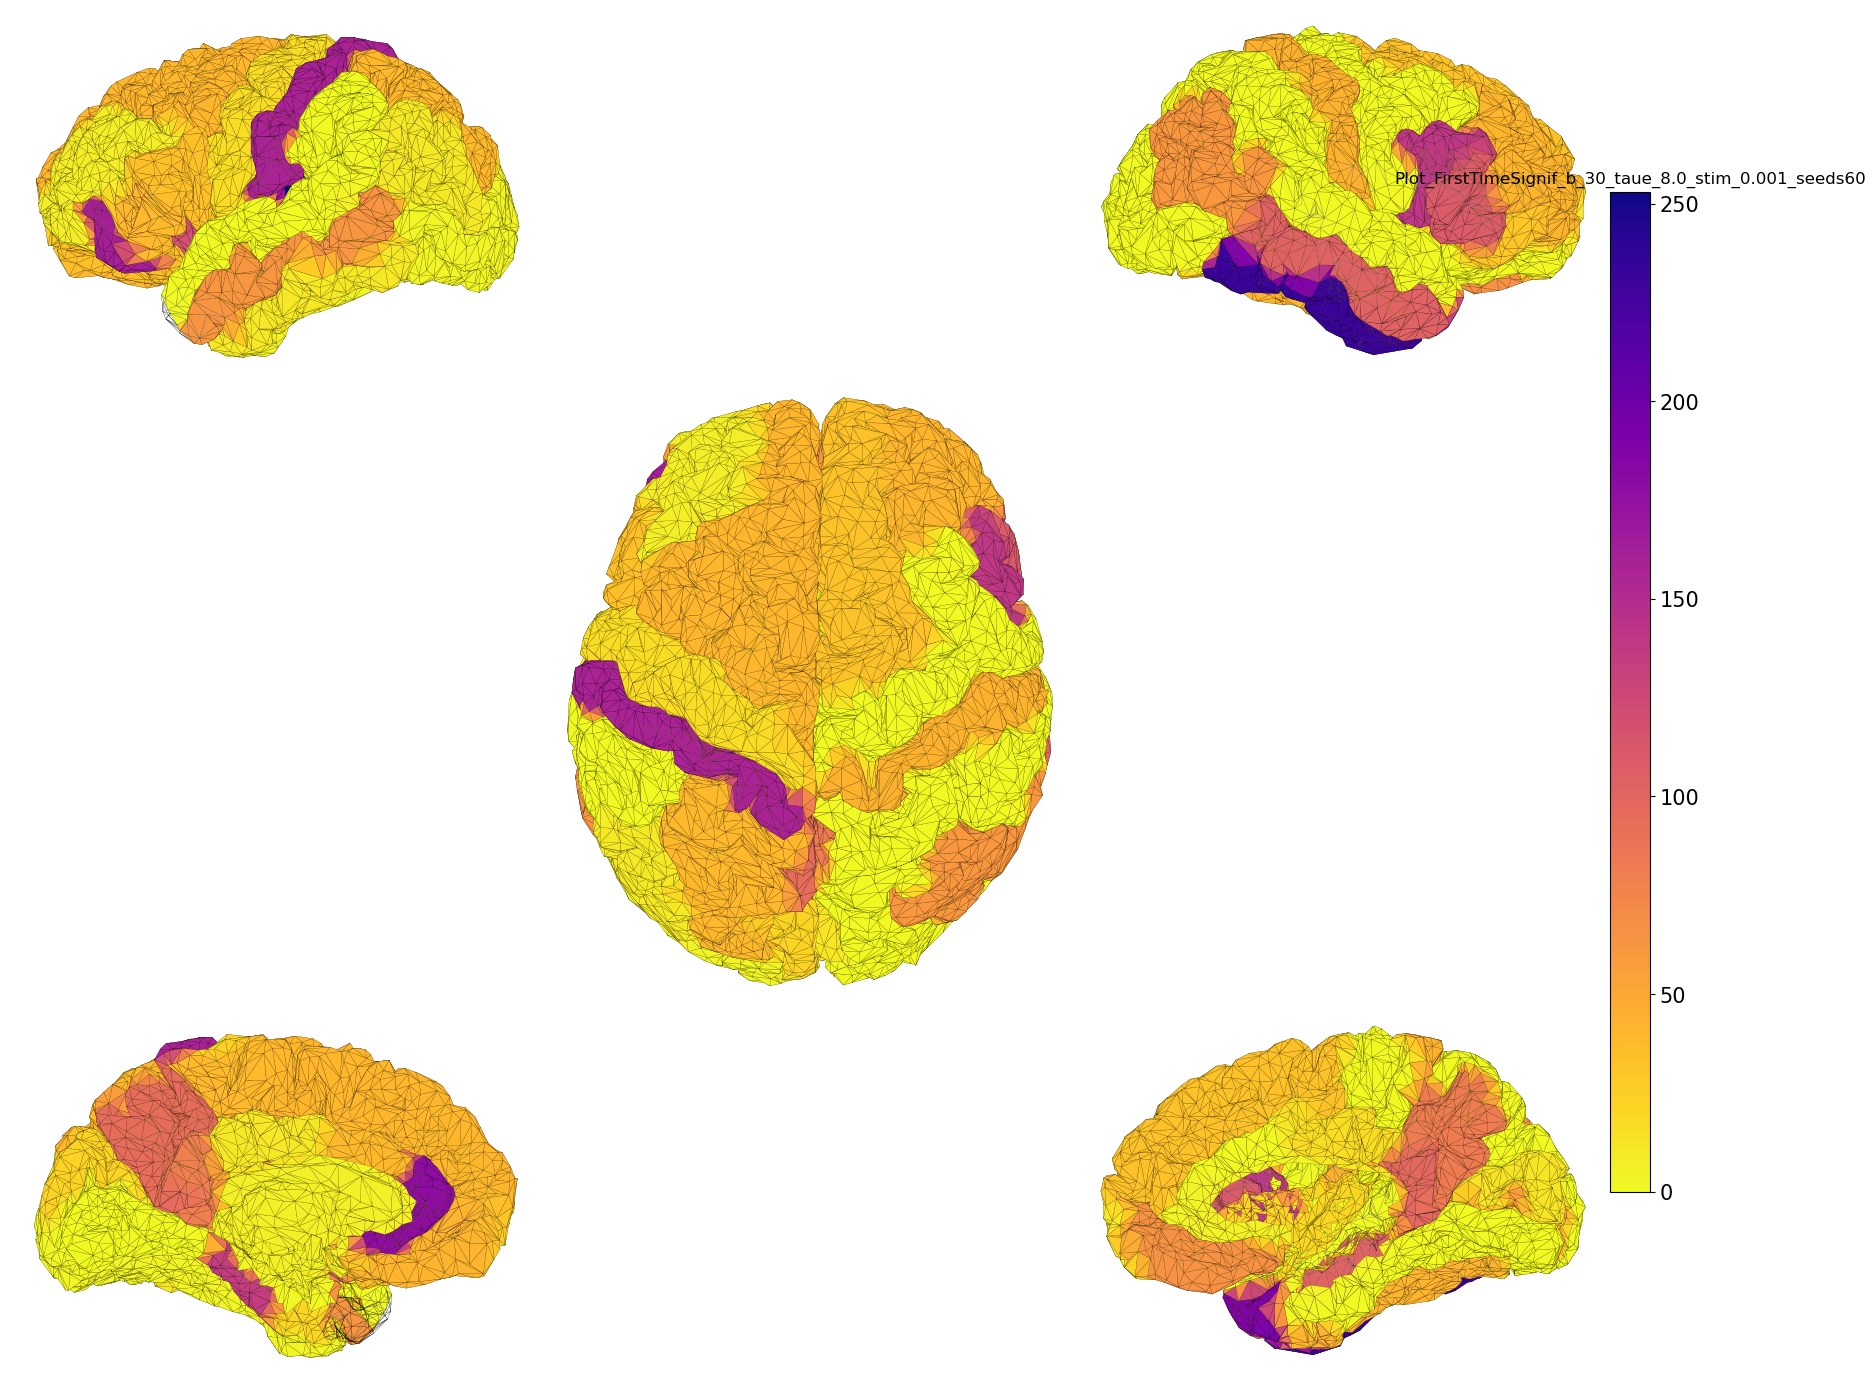

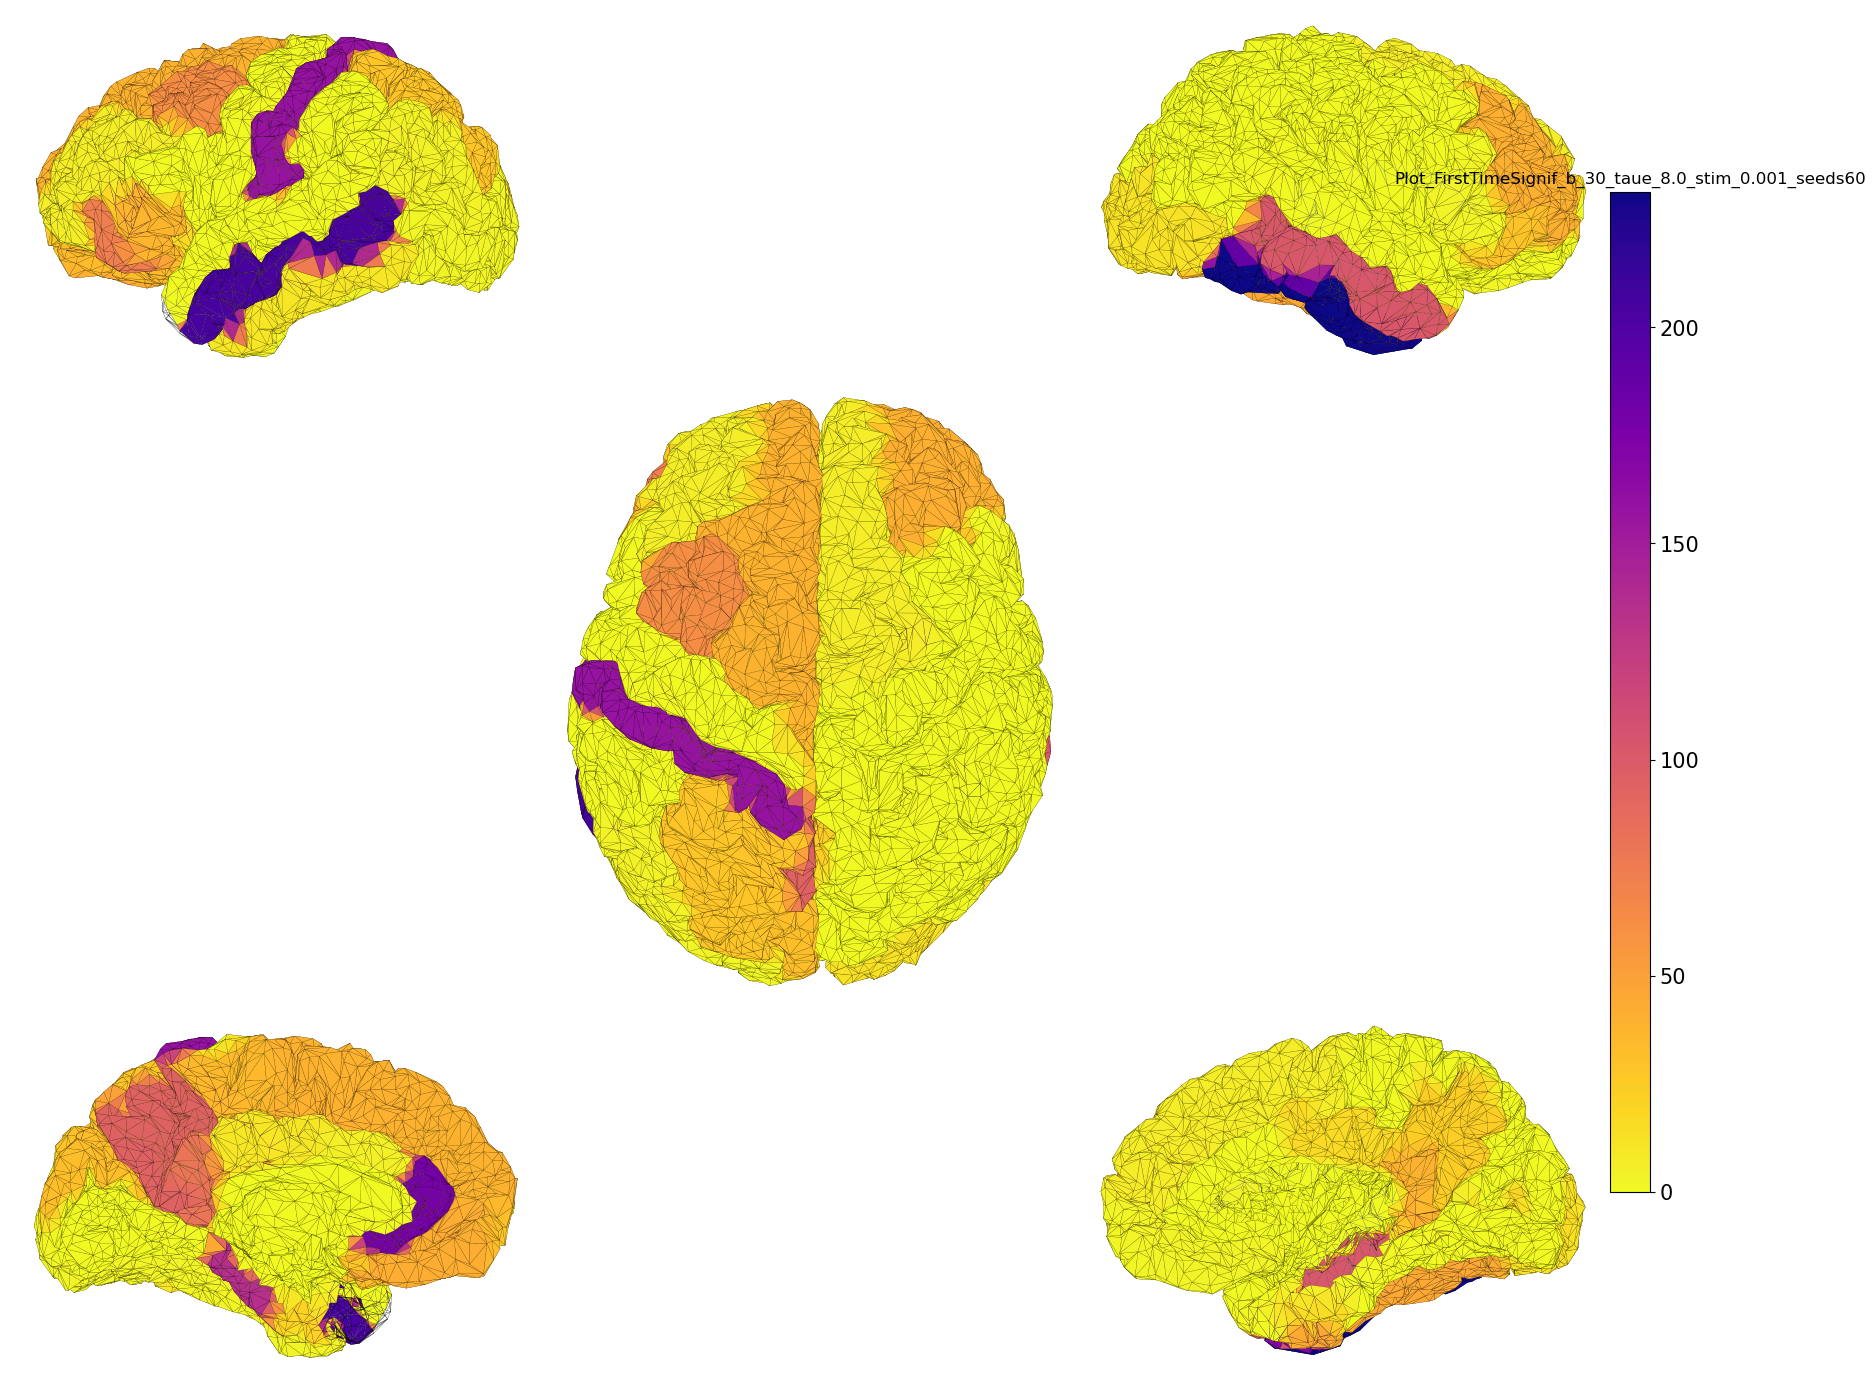

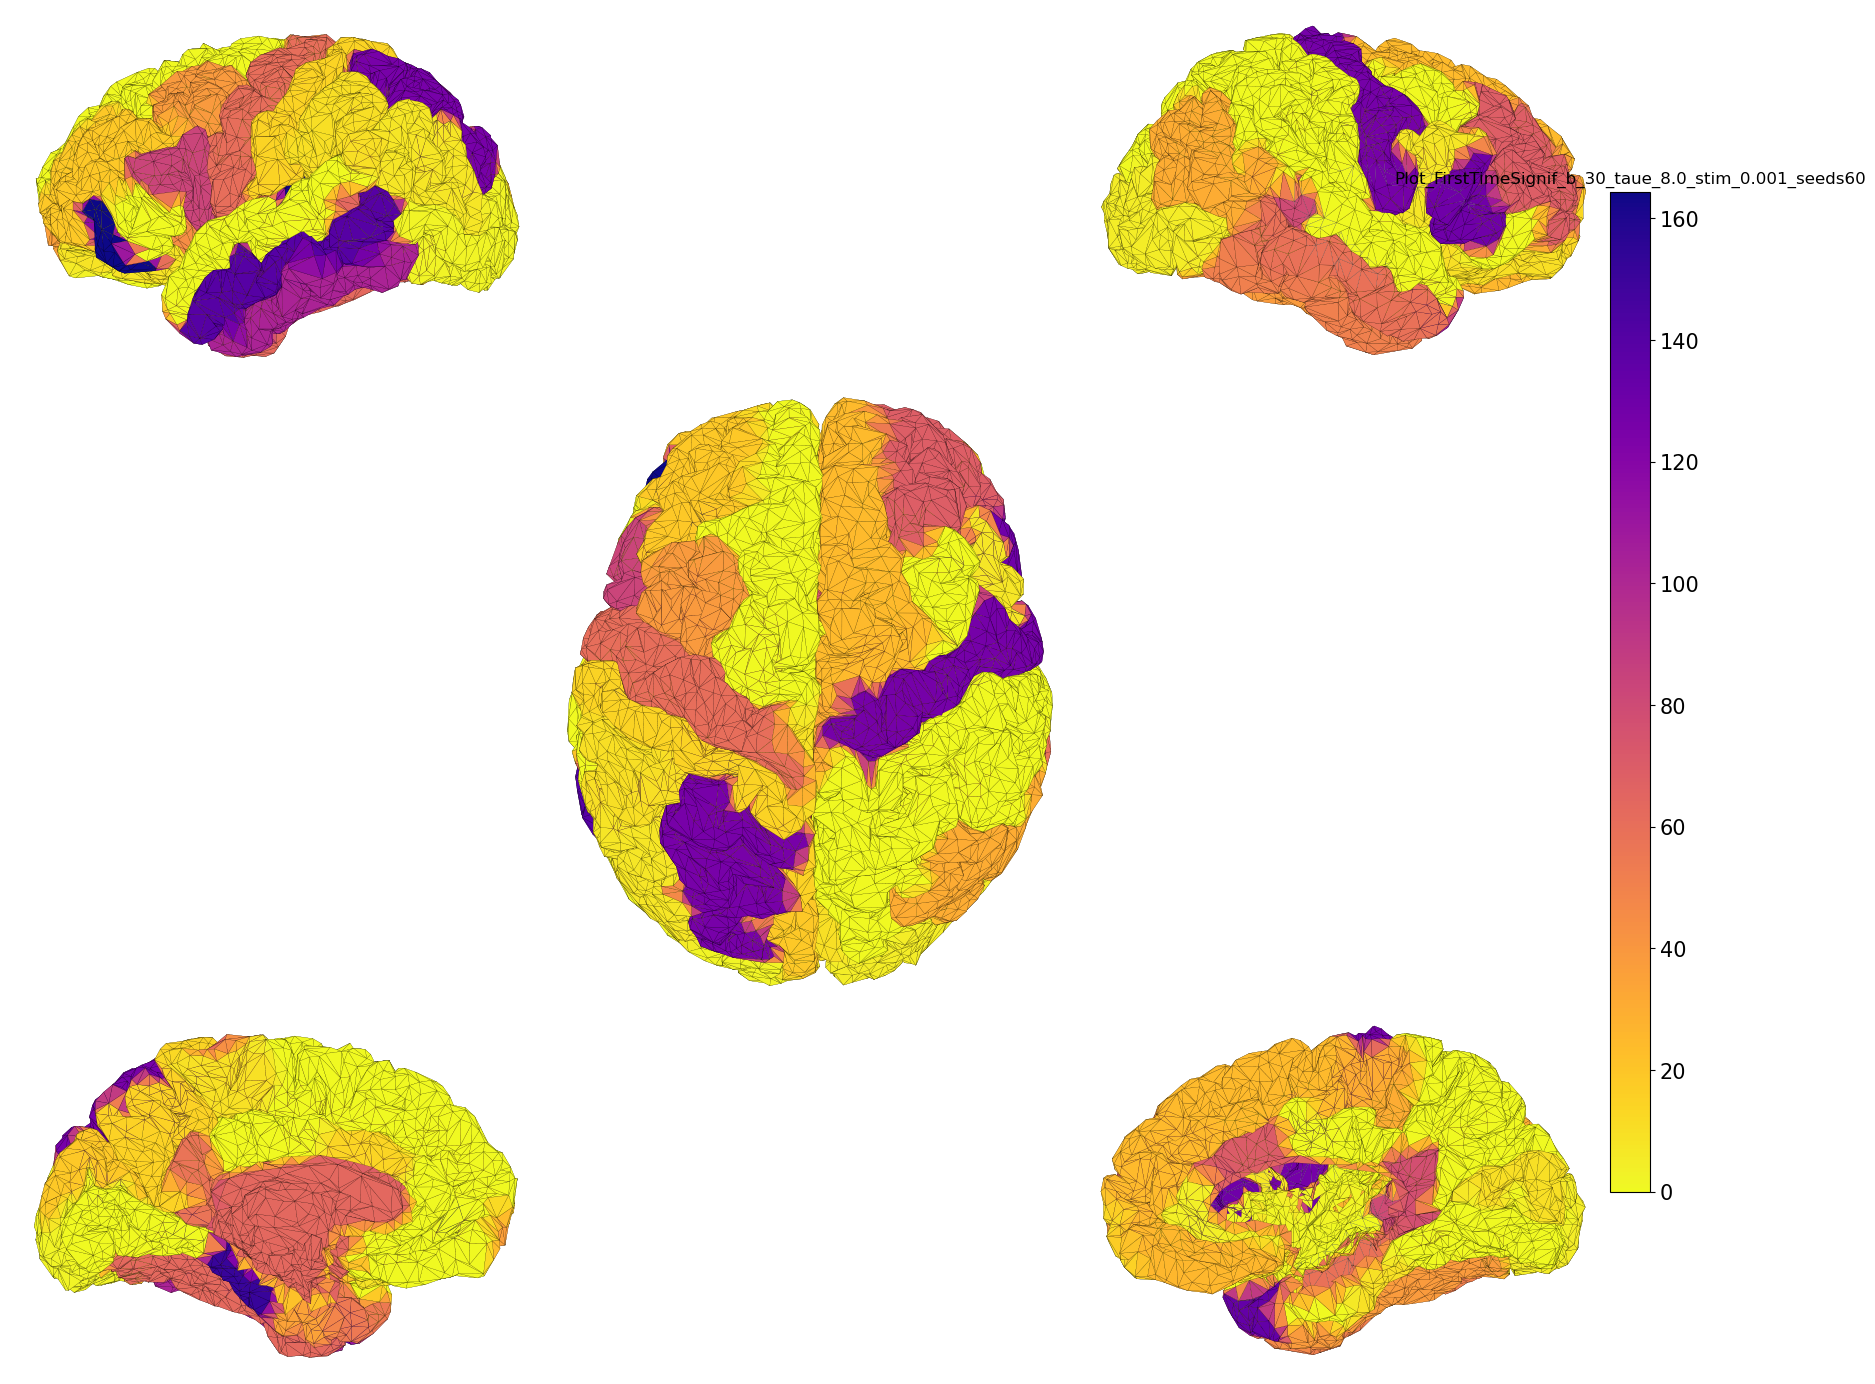

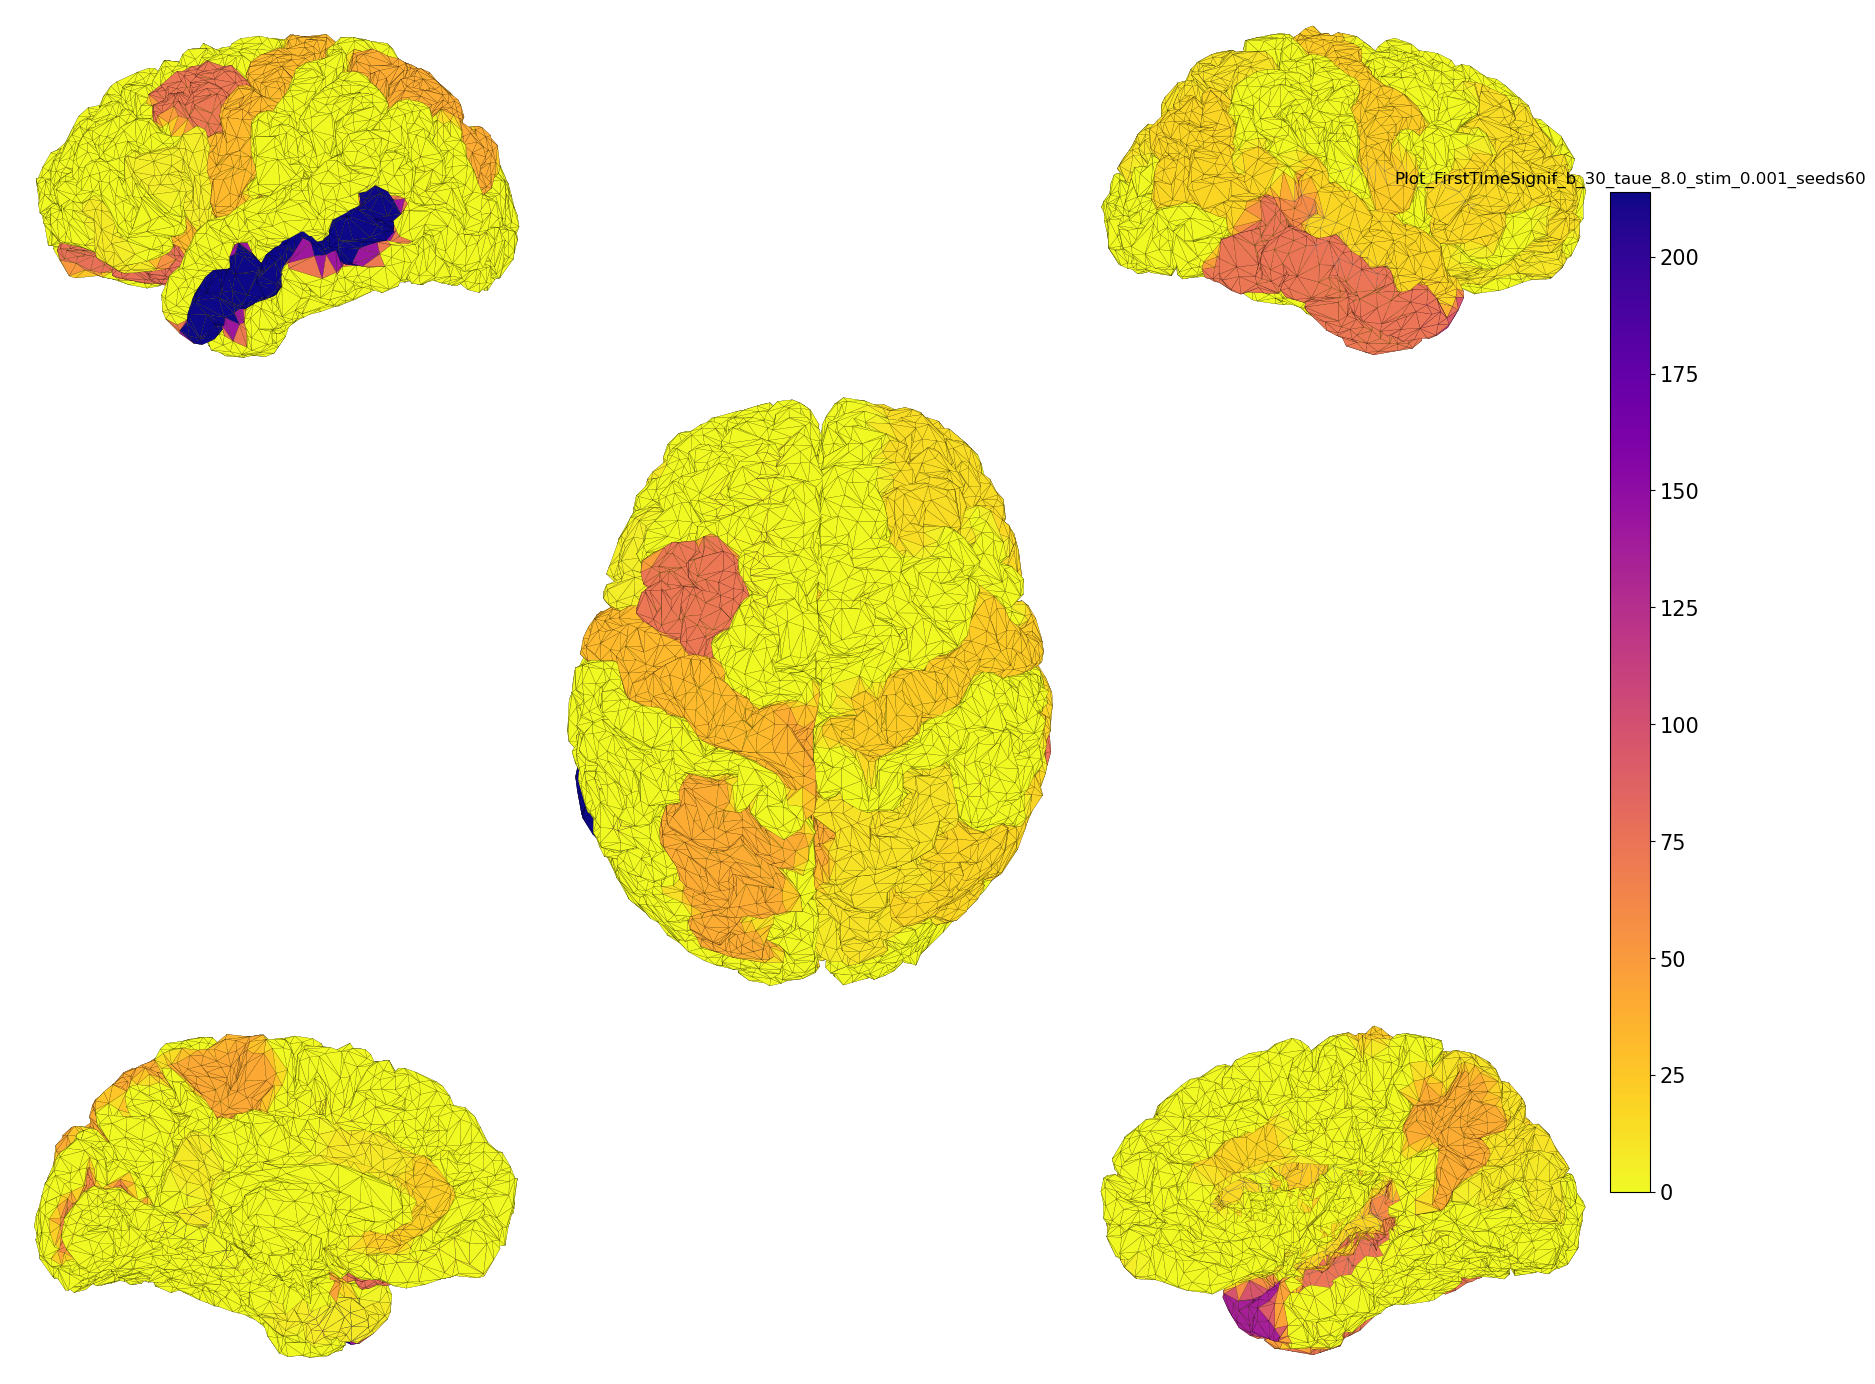

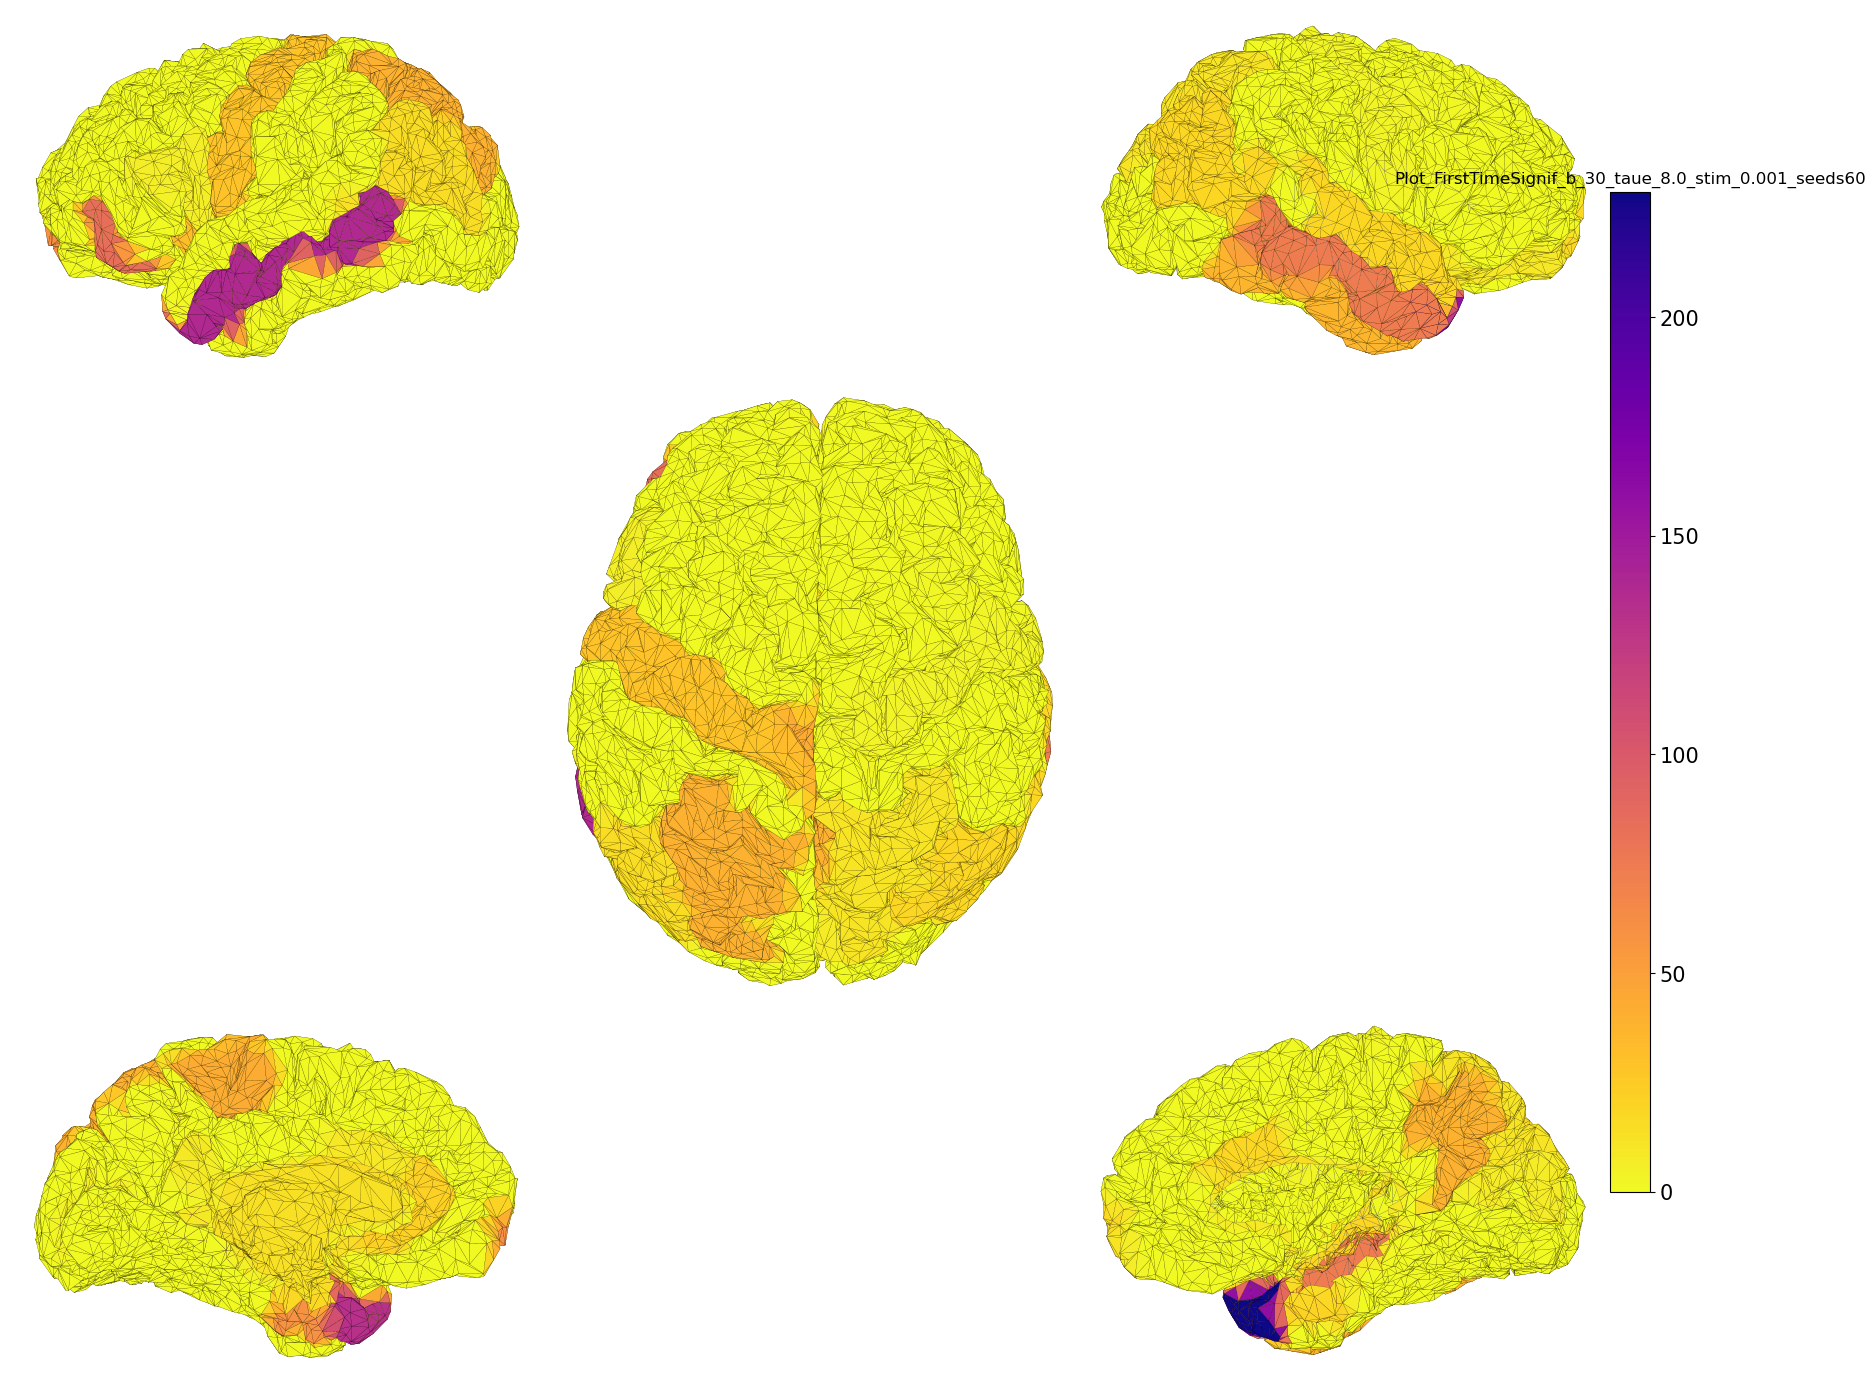

In [214]:

# #extract and plot first time significant by region

i_adap=0
i_stimval= # 0: 1e-5, 1: 1e-4, 2: 1e-3
i_taue = 2# 0: 5., 1: 4., 2: 3.75 or 5, 7, 8

i_sig = i_stimval*3 + i_taue

# Import resources
from tvb_model_reference.view.plot import multiview,multiview_one
from tvb.simulator.lab import cortex as ct
from tvb.simulator.lab import region_mapping as rm
from tvb.simulator.lab import surfaces as surf

# Import data of surface
region_mapping_data = np.loadtxt(parameters.parameter_connection_between_region['path']+'/RegionMapping.txt',dtype=np.int)
surface_cortex = surf.Surface().from_file(parameters.parameter_connection_between_region['path']+'/Surface_Cortex.zip')
hemispheres_right = np.where([False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True])[0]
hemispheres_left = np.where(np.logical_not([False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True]))[0]

# Configure surface data for ploting
tmp = np.copy(surface_cortex.vertices[:,0])
surface_cortex.vertices[:,0] = surface_cortex.vertices[:,1]
surface_cortex.vertices[:,1] = tmp
region_mapping=rm.RegionMapping(array_data=region_mapping_data,connectivity=simulator.connectivity,surface=surface_cortex)
cortex = ct.Cortex().from_file()
cortex.region_mapping_data = region_mapping

## plot
Nregions = len(sig_all_binary[-1])
first_time_sig = np.ones(Nregions)*np.NAN
print(int(len(sig_all_binary[-1,0])/2))
for n_tr in range(1,6):
    for i_reg in range(Nregions):
        sig_all_binary_single = sig_all_taus[i_sig]
        times_sig_curr = np.where(sig_all_binary_single[-n_tr,i_reg,int(len(sig_all_binary_single[-n_tr,0])/2):] == 1)[0]*timestep_ms
        if len(times_sig_curr) > 0: #significant once or more
            first_time_sig[i_reg] = times_sig_curr[0]

    print(first_time_sig)

    #%% And plot
    the_data = first_time_sig
    cmap = plt.cm.plasma #coolwarm #RdYlBu #YlGnBu #plt.cm.RdGy
    cmap = cmap.reversed()
    cmap.set_under(color='whitesmoke')
    multiview(cortex,hemispheres_left,hemispheres_right,the_data[region_mapping.array_data],plt.figure(figsize=(20, 20)), shaded=False,CB_position=[0.8, 0.25, 0.02, 0.5],
              CB_orientation='vertical',CB_fontsize=15,zmin=0,zmax=np.nanmax(the_data),cmap=cmap)
    plt.title('Plot_FirstTimeSignif_b_'+str(bvals[i_adap])+'_taue_'+str(tau_es[i_taue])+'_stim_'+str(stimvals[i_stimval])+'_seeds'+str(Nseeds))

# plt.savefig("/DATA/Maria/Anesthetics/figures_analysis_dur/"+'Plot_FirstTimeSignif_b_'+str(bvals[i_adap])+'_tau_e_'+str(tau_es[i_taue])+'_stim_'+str(stimvals[i_stimval])+'_seeds'+str(Nseeds)+'.png')

PCI_all -> list, len 3
PCI_all[0] ->list, len 3
PCI_all[0][0] ->

type of PCI_all[0][0] : <class 'numpy.ndarray'>
length of PCI_all[0][0] : 40
type of PCI_all[0][1] : <class 'numpy.ndarray'>
length of PCI_all[0][1] : 40
type of PCI_all[0][2] : <class 'numpy.ndarray'>
length of PCI_all[0][2] : 40

PCI_all[0] = stimval[0]
PCI_all[0][0] = stimval[0] tau_e[0] * 40 seeds

In [4]:
import json

In [18]:
# Choose the parameters of the results that you want to make movies
bvals = [30]
tau_es = [5.0, 8.0]
Iexts = [0.000315]
i_trials = 4
ampstim = 1e-4
## Load simulation variables for video:

FR_exc_vid = []
t_stim_onsets = []

for simbe in range(len(bvals)):
    for simnum in range(len(Iexts)):
        for tau_val in range(len(tau_es)):
            # tau_e
#             sim_name = 'stim_'+str(ampstim)+'_b_e_'+str(bvals[0])+ '_Iext_'+str(Iexts[0])+ "_tau_e_" + str(tau_val)\
#                         +"_El_e_" + str(parameters.parameter_model['E_L_e'])+ "_El_i_" + str(parameters.parameter_model['E_L_i'])\
#                         +'_seed_'+str(i_trials)+'/'      
            # tau_i
            sim_name = 'stim_'+str(ampstim)+'_b_e_'+str(bvals[0])+ '_Iext_'+str(Iexts[0])+ "_tau_i_" + str(tau_es[tau_val])\
                        +"_El_e_" + str(-64.0)+ "_El_i_" + str(parameters.parameter_model['E_L_i'])\
                        +'_seed_'+str(i_trials)+'/' 
            
            print ('... loading file: ' +  sim_name)       
            file_name =  ffolder_root + '/' + sim_name
            result = tools.get_result(file_name,cut_transient,run_sim)
            time_s = result[0][0]*1e-3 #from ms to sec
            
            with open(file_name+"parameter.json", 'r') as json_file:
                data = json.load(json_file)
            onset_value = data['parameter_stimulation']['onset']
            t_stim_bins = int((onset_value - cut_transient)/0.1)
            
            t_stim_onsets.append(t_stim_bins)

            '''fill variables'''
            FR_exc_vid.append(result[0][1][:,0,:]*1e3) # from KHz to Hz; Excitatory firing rate
            
            del result

... loading file: stim_0.0001_b_e_30_Iext_0.000315_tau_i_5.0_El_e_-64.0_El_i_-65.0_seed_4/
... loading file: stim_0.0001_b_e_30_Iext_0.000315_tau_i_8.0_El_e_-64.0_El_i_-65.0_seed_4/


In [19]:
onset_value

2997.9098172236268

In [15]:
t_stim_onsets

[5367, 5367]

In [6]:
from tvb_model_reference_new.view.plot_human import multiview, multiview_one, prepare_surface_regions_human, animation_nuu


In [7]:
tau_es = [8.0]

In [8]:
# prepare surface plot:

cortex, conn, hemispheres_left, hemispheres_right =\
prepare_surface_regions_human(parameters, 
                              conn_filename='Connectivity.zip', 
                              zip_filename= 'Surface_Cortex.zip', 
                              region_map_filename = 'RegionMapping.txt')


rows =int(len(tau_es))


for simbe in range(len(bvals)):
    for tau_val in range(len(tau_es)):

        factor = 200
        data = []
        for i, values in enumerate(FR_exc_vid[tau_val +  (rows*simbe)]): # for each time sample a vector of region values
            if  i % factor == 0:
                data.append(values[cortex.region_mapping])

        print ( len(data)*0.1*factor,'ms')        
        animation_nuu(cortex,hemispheres_left,hemispheres_right, data, 
                      file_name='./movie_b'+str(bvals[simbe])+'pA'+'tau_e'+str(tau_es[tau_val])+ 'ms_PCI.mp4', 
                      fps=10, my_dpi=100, factor=factor, label='Firing rate (Hz)',
                      use_old=False)

2000.0 ms
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 Moviepy - Building video ./movie_b30pAtau_e8.0ms_PCI.mp4.
Moviepy - Writing video ./movie_b30pAtau_e8.0ms_PCI.mp4



Moviepy - Done !
Moviepy - video ready ./movie_b30pAtau_e8.0ms_PCI.mp4


In [10]:
from ipywidgets import Output, GridspecLayout
from IPython import display
print ('\n                                              b = 30 pA')
print ('\n                     tau_E = 5.0 ms                                          tau_E = 4.0 ms')
print ('\n                     (asynchronous)                                           (synchronous)     ')

filepaths = ['movie_b30pAtau_e5.0ms_PCI',
             'movie_b30pAtau_e8.0ms_PCI.mp4']
grid = GridspecLayout(1, len(filepaths))
for i, filepath in enumerate(filepaths):
    out = Output()
    with out:
        display.display(display.Video(filepath, embed=True, width=500, height=250))
    grid[0, i] = out

grid




                                              b = 30 pA

                     tau_E = 5.0 ms                                          tau_E = 4.0 ms

                     (asynchronous)                                           (synchronous)     


GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [17]:
for i in range(len(PCI_all[2])):
    print(f"type of PCI_all[0][{i}] : {type(PCI_all[2][i])}")
    print(f"length of PCI_all[0][{i}] : {len(PCI_all[2][i])}")

type of PCI_all[0][0] : <class 'numpy.ndarray'>
length of PCI_all[0][0] : 40
type of PCI_all[0][1] : <class 'numpy.ndarray'>
length of PCI_all[0][1] : 40
type of PCI_all[0][2] : <class 'numpy.ndarray'>
length of PCI_all[0][2] : 40


In [18]:
len(PCI_all[0])

3

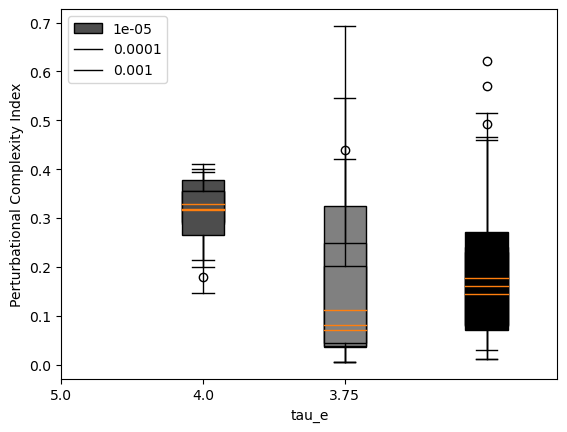

In [19]:
# ONE VALUE OF B_e

# Boxplots of PCI data
ampstim_colors=['0.3','0.5','0.']
plt.figure()
#print(PCI_all[0]) #len = (3,4) chaque [0,*] = une bval
#print(PCI_states)


for PCI_states in PCI_all:
        bplot=plt.boxplot(PCI_states,patch_artist=True)
        for patch,color in zip(bplot['boxes'], ampstim_colors):
            patch.set_facecolor(color)

plt.xticks(np.arange(len(tau_es)),tau_es)
#plt.xlabel('Adaptation')
plt.xlabel('tau_e')
plt.ylabel('Perturbational Complexity Index')
plt.legend(ampstim_all)
# plt.savefig('Boxplot_PCI_tau_e.pdf')
plt.show()


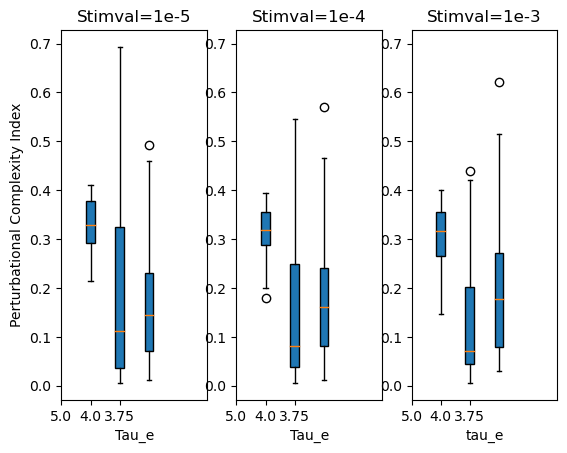

In [20]:
fig = plt.figure()

ax1=fig.add_subplot(1,3,1)
ax1.set_xlim(left=0, right = 5)
# ax1.set_ylim(bottom=0.15, top = 0.17)
plt.ylabel('Perturbational Complexity Index')
plt.xlabel('Tau_e')

# plt.xticks(np.arange(len(tau_is)), tau_is)

ax1.boxplot(PCI_all[0],patch_artist=True)
plt.title(label="Stimval=1e-5")

ax2=fig.add_subplot(1,3,2,sharey=ax1,sharex=ax1)
plt.xlabel('Tau_e')
ax2.boxplot(PCI_all[1],patch_artist=True)
plt.title(label="Stimval=1e-4")

ax3=fig.add_subplot(1,3,3,sharey=ax1,sharex=ax1)
plt.xlabel('Tau_e')
ax3.boxplot(PCI_all[2],patch_artist=True)
plt.title(label="Stimval=1e-3")

plt.xticks(np.arange(len(tau_es)), tau_es)
plt.xlabel('tau_e')


# # calculate the midpoints between the boxes
# positions = np.arange(len(tau_is)) * 3 + 1.5

# # set the xticks to the midpoints
# for ax in (ax1, ax2, ax3):
#     ax.set_xticks(positions)
#     ax.set_xticklabels(tau_is)

# fig.savefig('Boxplot_PCI_tau_e_2.pdf')
plt.show()



In [43]:
len(PCI_all[0])

3

In [12]:
# Statistics of PCI data
# Comparison between bvals
from scipy import stats
print(stats.mannwhitneyu(PCI_states[0], PCI_states[1]))
print(len(PCI_all)) 

MannwhitneyuResult(statistic=1060.0, pvalue=0.012523485955393246)
3


In [14]:
from scipy.stats import f_oneway

#ANOVA 
for i in range (len(PCI_all)):
    F, p = f_oneway(PCI_all[i][0],PCI_all[i][1],PCI_all[i][2])
    print("The F statistic for a stimulus strength = ",stimvals[i] ,"Hz equals ",F)
    print("The p value for a stimulus at", stimvals[i], "Hz is equals ", p ,"\n" )

"""the low p-value suggests that there is a statistically significant difference among at least two of the samples"""

The F statistic for a stimulus strength =  1e-05 Hz equals  10.994340543935232
The p value for a stimulus at 1e-05 Hz is equals  4.2128503917856906e-05 

The F statistic for a stimulus strength =  0.0001 Hz equals  16.360262981850102
The p value for a stimulus at 0.0001 Hz is equals  5.43143118885078e-07 

The F statistic for a stimulus strength =  0.001 Hz equals  24.122063182328016
The p value for a stimulus at 0.001 Hz is equals  1.6923885494693073e-09 



'the low p-value suggests that there is a statistically significant difference among at least two of the samples'

In [15]:
#TAU_I
import scipy.stats as stat

for i in range (len(PCI_all)):
    for j in range (len(PCI_all[0])):
        Agostino=stat.normaltest(PCI_all[i][j])
        print("For a stimval equal to ", stimvals[i],"and a tau_es equal to", tau_es[j], " we obtain with a Normality test ", Agostino, "\n")


For a stimval equal to  1e-05 and a tau_es equal to 5.0  we obtain with a Normality test  NormaltestResult(statistic=2.9974597515744663, pvalue=0.2234137432221737) 

For a stimval equal to  1e-05 and a tau_es equal to 4.5  we obtain with a Normality test  NormaltestResult(statistic=4.574886224818144, pvalue=0.10152572011945032) 

For a stimval equal to  1e-05 and a tau_es equal to 4.0  we obtain with a Normality test  NormaltestResult(statistic=6.889157541935738, pvalue=0.031918204085534155) 

For a stimval equal to  0.0001 and a tau_es equal to 5.0  we obtain with a Normality test  NormaltestResult(statistic=3.1263044069198154, pvalue=0.2094747224506015) 

For a stimval equal to  0.0001 and a tau_es equal to 4.5  we obtain with a Normality test  NormaltestResult(statistic=5.400749268693502, pvalue=0.06718033996197444) 

For a stimval equal to  0.0001 and a tau_es equal to 4.0  we obtain with a Normality test  NormaltestResult(statistic=7.519718954484302, pvalue=0.023287012500206167) 


In [17]:
import scipy.stats as stat

for i in range (len(PCI_all)):
    for j in range (len(PCI_all[0])):
        Agostino=stat.normaltest(PCI_all[i][j])
        print("For a stimval equal to ", stimvals[i],"and a tau_e equal to", tau_es[j], \
              " we obtain with a Normality test ", Agostino, "\n")

"""If the p-value is less than the significance level, then the null hypothesis of normality is rejected, 
and the data are considered significantly different from a normal distribution."""

For a stimval equal to  1e-05 and a tau_e equal to 5.0  we obtain with a Normality test  NormaltestResult(statistic=2.9974597515744663, pvalue=0.2234137432221737) 

For a stimval equal to  1e-05 and a tau_e equal to 4.5  we obtain with a Normality test  NormaltestResult(statistic=4.574886224818144, pvalue=0.10152572011945032) 

For a stimval equal to  1e-05 and a tau_e equal to 4.0  we obtain with a Normality test  NormaltestResult(statistic=6.889157541935738, pvalue=0.031918204085534155) 

For a stimval equal to  0.0001 and a tau_e equal to 5.0  we obtain with a Normality test  NormaltestResult(statistic=3.1263044069198154, pvalue=0.2094747224506015) 

For a stimval equal to  0.0001 and a tau_e equal to 4.5  we obtain with a Normality test  NormaltestResult(statistic=5.400749268693502, pvalue=0.06718033996197444) 

For a stimval equal to  0.0001 and a tau_e equal to 4.0  we obtain with a Normality test  NormaltestResult(statistic=7.519718954484302, pvalue=0.023287012500206167) 

For a

'If the p-value is less than the significance level, then the null hypothesis of normality is rejected, \nand the data are considered significantly different from a normal distribution.'

In [103]:
!pip install scikit_posthocs

In [18]:
try:
    import scikit_posthocs
except:
    print("not")

In [19]:
tau_es

[5.0, 4.5, 4.0]

In [20]:
#TAU_I
import scikit_posthocs as sp

for i in range(len(PCI_all)):
    print("For a stimval equals ", stimvals[i])
    Post_hoc=sp.posthoc_ttest(PCI_all[i], p_adjust = 'holm')
    print(Post_hoc, "\n") # number's column are for tau_es, #1=5.0 #2=4.5 #3=4.0 
    
""" this code performs a post-hoc pairwise t-test with Holm's method correction on each row of the PCI_all array, 
and prints the resulting matrix of p-values, 
which can be used to determine which pairs of samples (columns) differ significantly from each other."""

For a stimval equals  1e-05
          1         2         3
1  1.000000  0.028193  0.000037
2  0.028193  1.000000  0.028193
3  0.000037  0.028193  1.000000 

For a stimval equals  0.0001
              1        2             3
1  1.000000e+00  0.01019  2.875683e-07
2  1.018986e-02  1.00000  1.018986e-02
3  2.875683e-07  0.01019  1.000000e+00 

For a stimval equals  0.001
              1         2             3
1  1.000000e+00  0.017910  6.669706e-11
2  1.791012e-02  1.000000  3.988977e-04
3  6.669706e-11  0.000399  1.000000e+00 



" this code performs a post-hoc pairwise t-test with Holm's method correction on each row of the PCI_all array, \nand prints the resulting matrix of p-values, \nwhich can be used to determine which pairs of samples (columns) differ significantly from each other."

In [21]:
# ANOVA Non-parametric
#TAU_E
for i in range (len(PCI_all)):
    H, p = stat.kruskal(PCI_all[i][0],PCI_all[i][1],PCI_all[i][2])
    print("The H statistic for a stimulus strength = ",stimvals[i] ,"Hz equals ",H)
    print("The p value for a stimulus at", stimvals[i], "Hz is equals ", p ,"\n" )
    
    """The Kruskal-Wallis test is used to determine if at least one of the samples 
has a significantly different median than at least one of the others.

It doesn't assume normality, and it compares median and not means as the ANOVA
It can also be used for ordinal or continuous data (ANOVA is for continuous)"""

The H statistic for a stimulus strength =  1e-05 Hz equals  19.35499999999996
The p value for a stimulus at 1e-05 Hz is equals  6.267800307687602e-05 

The H statistic for a stimulus strength =  0.0001 Hz equals  27.60301652892565
The p value for a stimulus at 0.0001 Hz is equals  1.0141007847774448e-06 

The H statistic for a stimulus strength =  0.001 Hz equals  36.17309917355368
The p value for a stimulus at 0.001 Hz is equals  1.3967263222410503e-08 



In [22]:
#TAU_E

for i in range(len(PCI_all)):
    print("For a stimval equals ", stimvals[i])
    Post_hoc=sp.posthoc_conover(PCI_all[i], p_adjust = 'holm')
    print(Post_hoc, "\n") # number's column are for tau_is, #1=5.0 #2=6.0 #3=7.0 #4=8.0
    
"""
performs a post-hoc test (specifically, the Conover-Iman test) 
to compare the pairwise differences between groups for each level of the independent variable

The p_adjust = 'holm' argument specifies that the p-values should be adjusted using the Holm-Bonferroni method 
to control for multiple comparisons.

It doesn't assume normality

"""

For a stimval equals  1e-05
          1         2         3
1  1.000000  0.044576  0.000017
2  0.044576  1.000000  0.015045
3  0.000017  0.015045  1.000000 

For a stimval equals  0.0001
              1         2             3
1  1.000000e+00  0.015277  1.003023e-07
2  1.527655e-02  1.000000  1.536223e-03
3  1.003023e-07  0.001536  1.000000e+00 

For a stimval equals  0.001
              1         2             3
1  1.000000e+00  0.015822  4.216745e-10
2  1.582245e-02  1.000000  2.229685e-05
3  4.216745e-10  0.000022  1.000000e+00 



"\nperforms a post-hoc test (specifically, the Conover-Iman test) \nto compare the pairwise differences between groups for each level of the independent variable\n\nThe p_adjust = 'holm' argument specifies that the p-values should be adjusted using the Holm-Bonferroni method \nto control for multiple comparisons.\n\nIt doesn't assume normality\n\n"